In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# 
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
print('Hello World')

Hello World


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/lg-18650hg2-liion-battery-data/Dataset_Li-ion/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/lg-18650hg2-liion-battery-data/Dataset_Li-ion/Readme file - Description of Experimental Tests.txt
/kaggle/input/lg-18650hg2-liion-battery-data/Dataset_Li-ion/utils.py
/kaggle/input/lg-18650hg2-liion-battery-data/Dataset_Li-ion/Technical Information and Experimental Test Results for LG 18650HG2.pdf
/kaggle/input/lg-18650hg2-liion-battery-data/Dataset_Li-ion/10degC/575_Dis_2C.csv
/kaggle/input/lg-18650hg2-liion-battery-data/Dataset_Li-ion/10degC/567_US06.csv
/kaggle/input/lg-18650hg2-liion-battery-data/Dataset_Li-ion/10degC/567_Charge8.csv
/kaggle/input/lg-18650hg2-liion-battery-data/Dataset_Li-ion/10degC/571_Mixed7.csv
/kaggle/input/lg-18650hg2-liion-battery-data/Dataset_Li-ion/10degC/575_C20DisCh.csv
/kaggle/input/lg-18650hg2-liion-battery-data/Dataset_Li-ion/10degC/576_HWFET.csv
/kaggle/input/lg-18650hg2-liion-battery-data/Dataset_Li-ion/10degC/571_Charge16.csv
/kaggle/input/lg-18650hg2-liion-battery-data/Dataset_Li-ion/10degC/567_Mixed1.csv
/kaggle/input/lg-18650hg2-lii

In [4]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import time, random
from datetime import datetime, timedelta
import pytz, plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os

In [5]:
!dir "/kaggle/input/lg-18650hg2-liion-battery-data/Dataset_Li-ion/"


0degC
10degC
25degC
40degC
n10degC
n20degC
Readme\ file\ -\ Description\ of\ Experimental\ Tests.txt
Technical\ Information\ and\ Experimental\ Test\ Results\ for\ LG\ 18650HG2.pdf
utils.py


In [6]:
!dir "/kaggle/input/lg-18650hg2-liion-battery-data/Dataset_Li-ion/25degC/"

549_C20DisCh.csv  551_Charge4.csv  551_UDDS.csv      552_Charge16.csv
549_Charge.csv	  551_Charge5.csv  551_US06.csv      552_Charge9.csv
549_Dis_0p5C.csv  551_Charge6.csv  552_Cap_1C.csv    552_Mixed3.csv
549_Dis_2C.csv	  551_Charge7.csv  552_Charge10.csv  552_Mixed4.csv
549_HPPC.csv	  551_Charge8.csv  552_Charge11.csv  552_Mixed5.csv
551_Cap_1C.csv	  551_HWFET.csv    552_Charge12.csv  552_Mixed6.csv
551_Charge1.csv   551_LA92.csv	   552_Charge13.csv  552_Mixed7.csv
551_Charge2.csv   551_Mixed1.csv   552_Charge14.csv  552_Mixed8.csv
551_Charge3.csv   551_Mixed2.csv   552_Charge15.csv  552_PausCycl.csv


In [7]:
Main_Path="/kaggle/input/lg-18650hg2-liion-battery-data/Dataset_Li-ion/"

In [2]:
import pandas as pd

# Read the data, specify correct delimiter (comma or tabs), skip irrelevant rows (e.g., metadata)
train1 = os.path.join(Main_Path, "/kaggle/input/lg-18650hg2-liion-battery-data/Dataset_Li-ion/25degC/")

l = os.listdir(train1)
l = [i for i in l if i.endswith(".csv")]
l

NameError: name 'os' is not defined

# HPPC and OCV Data for Equivalent circuit Modelling

Open Circuit Voltage(OCV) mainly depends on : 
- **State of Charge (SoC):** OCV is a direct function of SoC, meaning as SoC increases, OCV also increases in a nonlinear manner. This relationship is determined by the Nernst equation and depends on the electrochemical potential of the electrodes. Each battery chemistry has a characteristic OCV-SoC curve.  

- **Temperature:** OCV varies with temperature due to changes in reaction kinetics and electrolyte conductivity. Higher temperatures generally reduce OCV slightly because of increased entropy effects, while lower temperatures increase OCV but may also slow down electrochemical reactions, affecting accuracy in SoC estimation.

It also depends on 
- **Battery Chemistry**: Different battery chemistries (e.g., Li-ion, NiMH, lead-acid) have distinct OCV characteristics.  
- **Aging/State of Health (SoH)**: As a battery degrades, its OCV curve may shift due to changes in internal resistance and capacity loss.  
- **Hysteresis Effects**: Some battery chemistries exhibit OCV hysteresis, meaning the voltage depends on whether the battery was previously charged or discharged.  
- **Electrode Material Properties**: The composition and structure of electrode materials influence the OCV by affecting ion intercalation/deintercalation.  
- **Electrolyte Composition**: The type and concentration of electrolytes impact the chemical potential and, consequently, the OCV.  

Would you like a more detailed explanation of how each factor influences OCV?

Battery modeling using **Hybrid Pulse Power Characterization (HPPC) and Open Circuit Voltage (OCV) data** involves several key steps:  

### **1. Data Collection**  
- **HPPC Test:** Perform charge/discharge pulses at different SoC levels to capture dynamic voltage response.  
- **OCV Test:** Allow the battery to rest for a long period after charging/discharging to measure equilibrium voltage at different SoC points.  

### **2. Data Preprocessing**  
- Filter out noise from voltage and current signals.  
- Align voltage, current, and temperature data with timestamps.  
- Extract OCV-SoC data by identifying steady-state voltage after rest periods.  

### **3. OCV-SoC Curve Fitting**  
- Fit the OCV-SoC data to an empirical or polynomial function.  
- Use methods like **lookup tables, spline interpolation, or regression models** to represent the OCV-SoC relationship.  

### **4. Equivalent Circuit Model (ECM) Parameter Identification**  
- Use HPPC test data to extract model parameters:  
  - **Internal Resistance (R0):** From the initial voltage drop after a pulse.  
  - **Polarization Resistance (R1, R2) and Capacitance (C1, C2):** Derived from voltage relaxation after current pulses.  
- Apply **curve fitting or system identification methods** to estimate parameters.  

### **5. Model Implementation & Validation**  
- Implement the identified ECM (e.g., Thevenin or RC model) in **MATLAB, Simulink, or Python**.  
- Simulate the battery voltage response under different load conditions.  
- Validate the model using test data and compute error metrics (e.g., RMSE, MAE).  


# 1. Data Collection

## OCV data

- 10degC/575_C20DisCh.csv
- 549_C20DisCh
549_C20DisCh
549_C20DisCh
549_C20DisCh
549_C20DisCh

In [9]:
# Read the data, specify correct delimiter (comma or tabs), skip irrelevant rows (e.g., metadata)
train1 = os.path.join(Main_Path, "/kaggle/input/lg-18650hg2-liion-battery-data/Dataset_Li-ion/")

l = os.listdir(train1)
l = [i for i in l if i.endswith(".csv")]
l

[]

In [10]:
import os
import glob

# Define the main path
Main_Path = "/kaggle/input/lg-18650hg2-liion-battery-data/Dataset_Li-ion/"

# Get all files ending with '_C20DisCh.csv'
files = glob.glob(os.path.join(Main_Path, "**", "*_C20DisCh.csv"), recursive=True)

# Access a specific file (e.g., 25degC/549_C20DisCh.csv)
#train1 = os.path.join(Main_Path, "25degC/549_C20DisCh.csv")

# Print results
print("All matching files:", files)
#print("Specific file path:", train1)


All matching files: ['/kaggle/input/lg-18650hg2-liion-battery-data/Dataset_Li-ion/10degC/575_C20DisCh.csv', '/kaggle/input/lg-18650hg2-liion-battery-data/Dataset_Li-ion/0degC/585_C20DisCh.csv', '/kaggle/input/lg-18650hg2-liion-battery-data/Dataset_Li-ion/n10degC/593_C20DisCh.csv', '/kaggle/input/lg-18650hg2-liion-battery-data/Dataset_Li-ion/n20degC/607_C20DisCh.csv', '/kaggle/input/lg-18650hg2-liion-battery-data/Dataset_Li-ion/25degC/549_C20DisCh.csv', '/kaggle/input/lg-18650hg2-liion-battery-data/Dataset_Li-ion/40degC/555_C20DisCh.csv']


All matching files: 
- '/kaggle/input/lg-18650hg2-liion-battery-data/Dataset_Li-ion/10degC/575_C20DisCh.csv',
- '/kaggle/input/lg-18650hg2-liion-battery-data/Dataset_Li-ion/0degC/585_C20DisCh.csv',
- '/kaggle/input/lg-18650hg2-liion-battery-data/Dataset_Li-ion/n10degC/593_C20DisCh.csv', 
- '/kaggle/input/lg-18650hg2-liion-battery-data/Dataset_Li-ion/n20degC/607_C20DisCh.csv',
- '/kaggle/input/lg-18650hg2-liion-battery-data/Dataset_Li-ion/25degC/549_C20DisCh.csv',
- '/kaggle/input/lg-18650hg2-liion-battery-data/Dataset_Li-ion/40degC/555_C20DisCh.csv'

In [11]:
OCV_25degC = os.path.join(Main_Path, "/kaggle/input/lg-18650hg2-liion-battery-data/Dataset_Li-ion/")
# OCV ie c/20 discharge at 25 degree celcius
OCV_25degC = os.path.join(OCV_25degC, "25degC/549_C20DisCh.csv")
df_OCV = pd.read_csv(OCV_25degC,skiprows=30)

In [12]:
df_OCV.columns = [
    "Time Stamp",
    "Step",
    "Status",
    "Prog Time",
    "Step Time",
    "Cycle",
    "Cycle Level",
    "Procedure",
    "Voltage",
    "Current",
    "Temperature",
    "Capacity",
    "WhAccu",
    "Cnt",
    "Empty",
]


In [13]:
#df_OCV = df_OCV.iloc[:, :-1]  # run only once
df_OCV.head(3)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Time Stamp,Step,Status,Prog Time,Step Time,Cycle,Cycle Level,Procedure,Voltage,Current,Temperature,Capacity,WhAccu,Cnt,Empty
0,10/26/2018 9:30:22 AM,22,DCH,29:21:19.688,00:02:00.002,0,0,LG_HG2_NN_Char,4.17301,-0.15325,23.97615,-0.00507,-0.02116,13.0,NaN
1,10/26/2018 9:31:22 AM,22,DCH,29:22:19.688,00:03:00.002,0,0,LG_HG2_NN_Char,4.17014,-0.15069,23.97615,-0.00761,-0.03176,13.0,NaN
2,10/26/2018 9:32:22 AM,22,DCH,29:23:19.685,00:03:59.999,0,0,LG_HG2_NN_Char,4.16761,-0.15069,23.76583,-0.01014,-0.04232,13.0,NaN


In [14]:
df_OCV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2422 entries, 0 to 2421
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time Stamp   2422 non-null   object 
 1   Step         2422 non-null   int64  
 2   Status       2422 non-null   object 
 3   Prog Time    2422 non-null   object 
 4   Step Time    2422 non-null   object 
 5   Cycle        2422 non-null   int64  
 6   Cycle Level  2422 non-null   int64  
 7   Procedure    2422 non-null   object 
 8   Voltage      2422 non-null   float64
 9   Current      2422 non-null   float64
 10  Temperature  2422 non-null   float64
 11  Capacity     2422 non-null   float64
 12  WhAccu       2422 non-null   float64
 13  Cnt          2422 non-null   float64
 14  Empty        0 non-null      float64
dtypes: float64(7), int64(3), object(5)
memory usage: 284.0+ KB


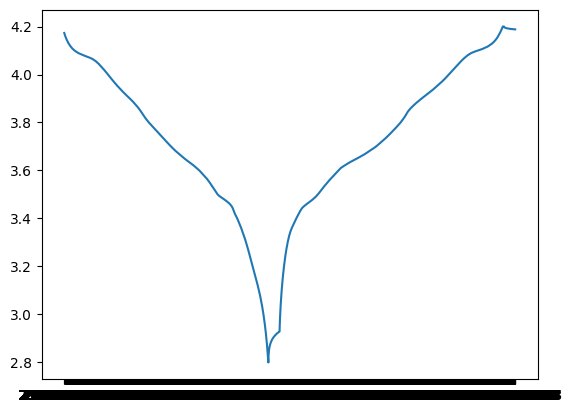

In [15]:
plt.plot(df_OCV['Prog Time'], df_OCV.Voltage)

In [16]:
print(df_OCV.Status.unique())
print(df_OCV.Step.unique())


['DCH' 'PAU' 'CHA']
[22 23 24 25]


In [17]:
df_dis = df_OCV[df_OCV['Status'] == 'DCH']  # Discharge Data
df_chg = df_OCV[df_OCV['Status'] == 'CHA']  # Charge Data
print(df_dis.shape)
print(df_chg.shape)

(1096, 15)
(1204, 15)


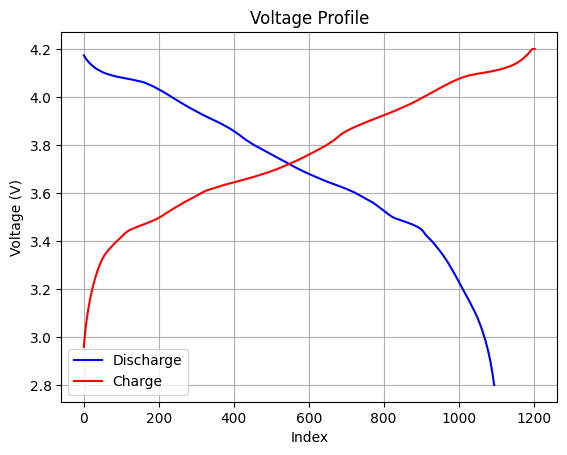

In [18]:
plt.plot(np.arange(len(df_dis)), df_dis['Voltage'], label="Discharge", color='b')
plt.plot(np.arange(len(df_chg)), df_chg['Voltage'], label="Charge", color='r')

plt.xlabel("Index")
plt.ylabel("Voltage (V)")
plt.title("Voltage Profile")
plt.legend()
plt.grid()
plt.show()


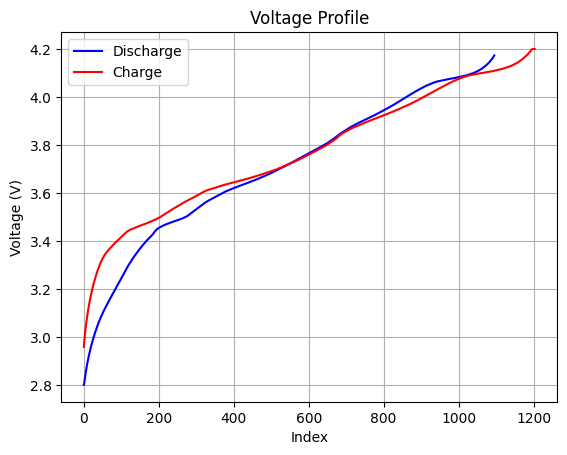

In [ ]:
plt.plot(np.arange(len(df_dis)), df_dis['Voltage'][::-1], label="Discharge", color='b')  
plt.plot(np.arange(len(df_chg)), df_chg['Voltage'], label="Charge", color='r')

plt.xlabel("Index")
plt.ylabel("Voltage (V)")
plt.title("Voltage Profile")
plt.legend()
plt.grid()
plt.show()


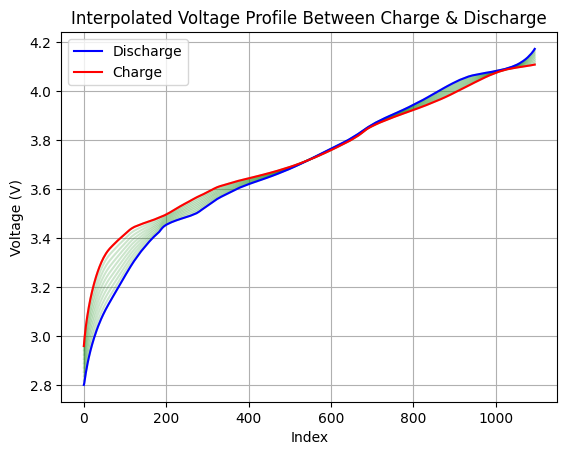

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Ensure both series have the same length by trimming to the shortest
min_len = min(len(df_dis), len(df_chg))
x_common = np.linspace(0, min_len - 1, min_len)  # Common x-axis

# Interpolation model (Linear or Cubic)
interp_model = interp1d([0, 1], np.vstack([df_dis['Voltage'][:min_len][::-1], df_chg['Voltage'][:min_len]]), axis=0, kind='linear')

# Generate interpolated values in between
interp_steps = np.linspace(0, 1, 10)  # Creates 10 interpolated curves between discharge and charge
for step in interp_steps:
    plt.plot(x_common, interp_model(step), color='g', alpha=0.2)

# Plot Discharge, Charge, and Interpolation
plt.plot(x_common, df_dis['Voltage'][:min_len][::-1], label="Discharge", color='b')
plt.plot(x_common, df_chg['Voltage'][:min_len], label="Charge", color='r')

plt.xlabel("Index")
plt.ylabel("Voltage (V)")
plt.title("Interpolated Voltage Profile Between Charge & Discharge")
plt.legend()
plt.grid()
plt.show()




# SoC percentage for discharging

In [21]:
# here we use absolute value of minimum value in Capacity column because it is a discharge and value is negative
max_discharge = abs(min(df_dis["Capacity"])) # get maximum discharge
df_dis["SoC Capacity"] = max_discharge + df_dis["Capacity"]
df_dis["SoC Percentage"] = df_dis["SoC Capacity"] / max(df_dis["SoC Capacity"])

<ipython-input-21-095591eb9611>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dis["SoC Capacity"] = max_discharge + df_dis["Capacity"]
<ipython-input-21-095591eb9611>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dis["SoC Percentage"] = df_dis["SoC Capacity"] / max(df_dis["SoC Capacity"])


In [22]:
df_dis.tail()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Time Stamp,Step,Status,Prog Time,Step Time,Cycle,Cycle Level,Procedure,Voltage,Current,Temperature,Capacity,WhAccu,Cnt,Empty,SoC Capacity,SoC Percentage
1091,10/27/2018 3:41:22 AM,22,DCH,47:32:19.688,18:13:00.002,0,0,LG_HG2_NN_Char,2.84021,-0.15325,23.97615,-2.77169,-10.27726,13.0,NaN,0.00905,0.003260
1092,10/27/2018 3:42:22 AM,22,DCH,47:33:19.685,18:13:59.999,0,0,LG_HG2_NN_Char,2.82943,-0.15325,23.97615,-2.77423,-10.28447,13.0,NaN,0.00651,0.002345
1093,10/27/2018 3:43:22 AM,22,DCH,47:34:19.686,18:15:00.000,0,0,LG_HG2_NN_Char,2.81830,-0.15325,23.97615,-2.77677,-10.29163,13.0,NaN,0.00397,0.001430
1094,10/27/2018 3:44:22 AM,22,DCH,47:35:19.686,18:16:00.000,0,0,LG_HG2_NN_Char,2.80667,-0.15325,23.97615,-2.77931,-10.29878,13.0,NaN,0.00143,0.000515
1095,10/27/2018 3:44:56 AM,22,DCH,47:35:53.540,18:16:33.854,0,0,LG_HG2_NN_Char,2.79993,-0.15069,23.97615,-2.78074,-10.30280,13.0,NaN,0.00000,0.000000


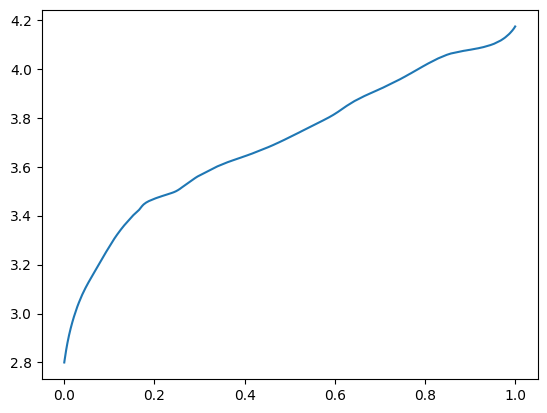

In [23]:
plt.plot(df_dis['SoC Percentage'],df_dis['Voltage'])

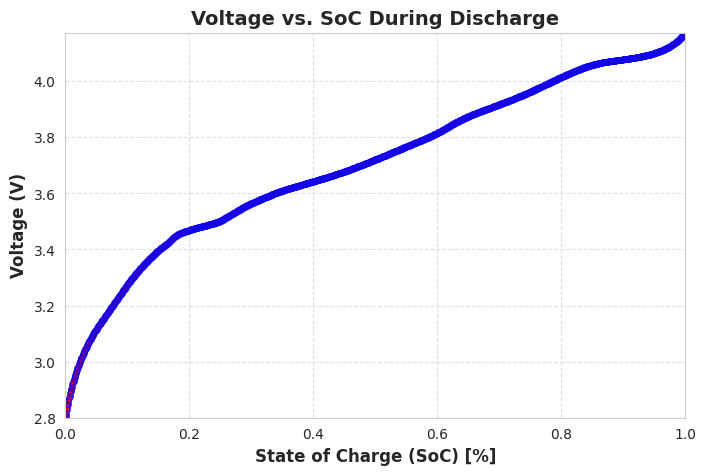

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(8, 5))  # Set figure size
plt.plot(df_dis['SoC Percentage'], df_dis['Voltage'], color='b', linewidth=2, linestyle='-', marker='o', markersize=4, markerfacecolor='red', alpha=0.8)

# Labels and Title
plt.xlabel("State of Charge (SoC) [%]", fontsize=12, fontweight='bold')
plt.ylabel("Voltage (V)", fontsize=12, fontweight='bold')
plt.title("Voltage vs. SoC During Discharge", fontsize=14, fontweight='bold')

# Grid and Customization
plt.grid(True, linestyle='--', alpha=0.6)  # Light grid for readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(df_dis['SoC Percentage'].min(), df_dis['SoC Percentage'].max())  # Auto-scale X-axis
plt.ylim(df_dis['Voltage'].min(), df_dis['Voltage'].max())  # Auto-scale Y-axis

# Show the plot
plt.show()


## SoC percentage For Charging

In [25]:
max_charge = abs(min(df_chg["Capacity"])) # get maximum discharge
df_chg["SoC Capacity"] = max_charge + df_chg["Capacity"]
df_chg["SoC Percentage"] = df_chg["SoC Capacity"] / max(df_chg["SoC Capacity"])

<ipython-input-25-6315d6eaf077>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chg["SoC Capacity"] = max_charge + df_chg["Capacity"]
<ipython-input-25-6315d6eaf077>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chg["SoC Percentage"] = df_chg["SoC Capacity"] / max(df_chg["SoC Capacity"])


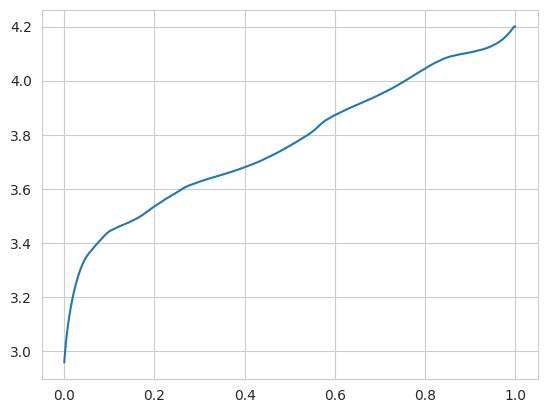

In [26]:
plt.plot(df_chg['SoC Percentage'],df_chg['Voltage'])

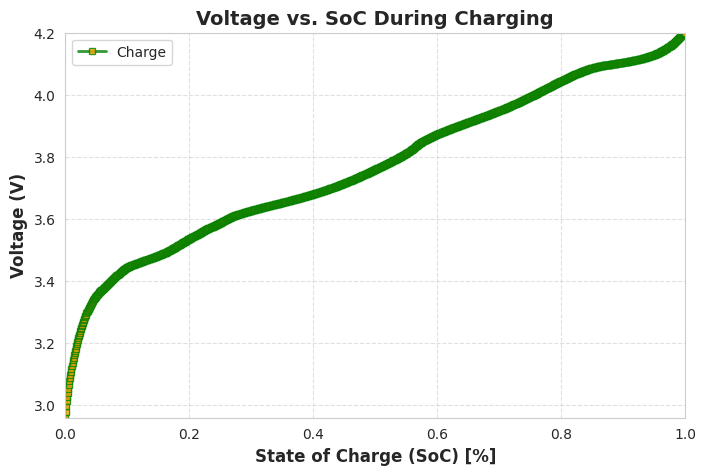

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(8, 5))

# Plot Charge Curve with Enhanced Styling
plt.plot(df_chg['SoC Percentage'], df_chg['Voltage'], 
         color='green', linewidth=2, linestyle='-', 
         marker='s', markersize=5, markerfacecolor='orange', alpha=0.8, label="Charge")

# Labels and Title
plt.xlabel("State of Charge (SoC) [%]", fontsize=12, fontweight='bold')
plt.ylabel("Voltage (V)", fontsize=12, fontweight='bold')
plt.title("Voltage vs. SoC During Charging", fontsize=14, fontweight='bold')

# Grid and Customization
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(df_chg['SoC Percentage'].min(), df_chg['SoC Percentage'].max())  # Auto-scale X-axis
plt.ylim(df_chg['Voltage'].min(), df_chg['Voltage'].max())  # Auto-scale Y-axis

# Legend
plt.legend(fontsize=10, loc="best")

# Show the plot
plt.show()


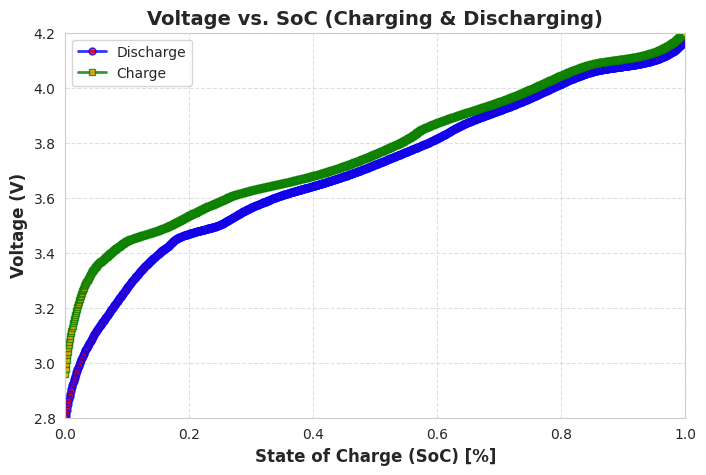

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(8, 5))

# Plot Discharge Curve
plt.plot(df_dis['SoC Percentage'], df_dis['Voltage'], 
         color='blue', linewidth=2, linestyle='-', 
         marker='o', markersize=5, markerfacecolor='red', 
         alpha=0.8, label="Discharge")

# Plot Charge Curve
plt.plot(df_chg['SoC Percentage'], df_chg['Voltage'], 
         color='green', linewidth=2, linestyle='-', 
         marker='s', markersize=5, markerfacecolor='orange', 
         alpha=0.8, label="Charge")

# Labels and Title
plt.xlabel("State of Charge (SoC) [%]", fontsize=12, fontweight='bold')
plt.ylabel("Voltage (V)", fontsize=12, fontweight='bold')
plt.title("Voltage vs. SoC (Charging & Discharging)", fontsize=14, fontweight='bold')

# Grid and Customization
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(min(df_dis['SoC Percentage'].min(), df_chg['SoC Percentage'].min()), 
         max(df_dis['SoC Percentage'].max(), df_chg['SoC Percentage'].max()))  # Auto-scale X-axis
plt.ylim(min(df_dis['Voltage'].min(), df_chg['Voltage'].min()), 
         max(df_dis['Voltage'].max(), df_chg['Voltage'].max()))  # Auto-scale Y-axis

# Legend
plt.legend(fontsize=10, loc="best")

# Show the plot
plt.show()


In [29]:
df_dis.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Time Stamp,Step,Status,Prog Time,Step Time,Cycle,Cycle Level,Procedure,Voltage,Current,Temperature,Capacity,WhAccu,Cnt,Empty,SoC Capacity,SoC Percentage
0,10/26/2018 9:30:22 AM,22,DCH,29:21:19.688,00:02:00.002,0,0,LG_HG2_NN_Char,4.17301,-0.15325,23.97615,-0.00507,-0.02116,13.0,NaN,2.77567,1.000000
1,10/26/2018 9:31:22 AM,22,DCH,29:22:19.688,00:03:00.002,0,0,LG_HG2_NN_Char,4.17014,-0.15069,23.97615,-0.00761,-0.03176,13.0,NaN,2.77313,0.999085
2,10/26/2018 9:32:22 AM,22,DCH,29:23:19.685,00:03:59.999,0,0,LG_HG2_NN_Char,4.16761,-0.15069,23.76583,-0.01014,-0.04232,13.0,NaN,2.77060,0.998173
3,10/26/2018 9:33:22 AM,22,DCH,29:24:19.688,00:05:00.002,0,0,LG_HG2_NN_Char,4.16509,-0.15325,23.66067,-0.01268,-0.05290,13.0,NaN,2.76806,0.997258
4,10/26/2018 9:34:22 AM,22,DCH,29:25:19.688,00:06:00.002,0,0,LG_HG2_NN_Char,4.16273,-0.15325,23.76583,-0.01522,-0.06348,13.0,NaN,2.76552,0.996343


In [30]:
df_dis["disAh"] = np.abs(df_dis['Capacity'])
df_chg["chgAh"] = (df_chg['Capacity']) + max_discharge

<ipython-input-30-ec7bbe1fb6a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dis["disAh"] = np.abs(df_dis['Capacity'])
<ipython-input-30-ec7bbe1fb6a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chg["chgAh"] = (df_chg['Capacity']) + max_discharge


In [31]:
df_dis.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Time Stamp,Step,Status,Prog Time,Step Time,Cycle,Cycle Level,Procedure,Voltage,Current,Temperature,Capacity,WhAccu,Cnt,Empty,SoC Capacity,SoC Percentage,disAh
0,10/26/2018 9:30:22 AM,22,DCH,29:21:19.688,00:02:00.002,0,0,LG_HG2_NN_Char,4.17301,-0.15325,23.97615,-0.00507,-0.02116,13.0,NaN,2.77567,1.000000,0.00507
1,10/26/2018 9:31:22 AM,22,DCH,29:22:19.688,00:03:00.002,0,0,LG_HG2_NN_Char,4.17014,-0.15069,23.97615,-0.00761,-0.03176,13.0,NaN,2.77313,0.999085,0.00761
2,10/26/2018 9:32:22 AM,22,DCH,29:23:19.685,00:03:59.999,0,0,LG_HG2_NN_Char,4.16761,-0.15069,23.76583,-0.01014,-0.04232,13.0,NaN,2.77060,0.998173,0.01014
3,10/26/2018 9:33:22 AM,22,DCH,29:24:19.688,00:05:00.002,0,0,LG_HG2_NN_Char,4.16509,-0.15325,23.66067,-0.01268,-0.05290,13.0,NaN,2.76806,0.997258,0.01268
4,10/26/2018 9:34:22 AM,22,DCH,29:25:19.688,00:06:00.002,0,0,LG_HG2_NN_Char,4.16273,-0.15325,23.76583,-0.01522,-0.06348,13.0,NaN,2.76552,0.996343,0.01522


In [32]:
df_chg.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Time Stamp,Step,Status,Prog Time,Step Time,Cycle,Cycle Level,Procedure,Voltage,Current,Temperature,Capacity,WhAccu,Cnt,Empty,SoC Capacity,SoC Percentage,chgAh
1157,10/27/2018 4:45:56 AM,24,CHA,48:36:53.549,00:01:00.002,0,0,LG_HG2_NN_Char,2.95864,0.14814,23.97615,-2.77827,-10.29552,13.0,NaN,0.00000,0.000000,0.00247
1158,10/27/2018 4:46:56 AM,24,CHA,48:37:53.547,00:02:00.000,0,0,LG_HG2_NN_Char,2.97820,0.14814,23.87099,-2.77580,-10.28818,13.0,NaN,0.00247,0.000832,0.00494
1159,10/27/2018 4:47:56 AM,24,CHA,48:38:53.550,00:03:00.003,0,0,LG_HG2_NN_Char,2.99573,0.14814,23.97615,-2.77332,-10.28078,13.0,NaN,0.00495,0.001668,0.00742
1160,10/27/2018 4:48:56 AM,24,CHA,48:39:53.547,00:04:00.000,0,0,LG_HG2_NN_Char,3.01157,0.15069,23.87099,-2.77084,-10.27334,13.0,NaN,0.00743,0.002503,0.00990
1161,10/27/2018 4:49:56 AM,24,CHA,48:40:53.548,00:05:00.001,0,0,LG_HG2_NN_Char,3.02624,0.14814,23.97615,-2.76837,-10.26586,13.0,NaN,0.00990,0.003335,0.01237


# 3. Open Circuit Voltage and SOC relationship

In [33]:
from datetime import timedelta

def time_string_to_seconds(input_string: str) -> float:
    time_parts = input_string.split(":")
    second_parts = time_parts[2].split(".")
    return timedelta(
        hours = int(time_parts[0]),
        minutes = int(time_parts[1]),
        seconds = int(second_parts[0]),
        microseconds = int(second_parts[1]),
    ).total_seconds()

In [1]:
import numpy as np

# Convert "Prog Time" column to total seconds
df_dis["Time Seconds"] = df_dis["Prog Time"].apply(time_string_to_seconds)
df_chg["Time Seconds"] = df_chg["Prog Time"].apply(time_string_to_seconds)

# Assign variables as NumPy arrays
disAh = df_dis["disAh"].to_numpy()
dis_current = df_dis["Current"].to_numpy()
dis_time = df_dis["Time Seconds"].to_numpy()
dis_time = dis_time-dis_time[0]
disV = df_dis["Voltage"].to_numpy()
disZ = df_dis["SoC Percentage"].to_numpy()

chgAh = df_chg["chgAh"].to_numpy()
chg_current = df_chg["Current"].to_numpy()
chg_time = df_chg["Time Seconds"].to_numpy()
chg_time = chg_time-chg_time[0]
chgV = df_chg["Voltage"].to_numpy()
chgZ = df_chg["SoC Percentage"].to_numpy()

SOC = np.arange(0, 1.005, 0.005)


NameError: name 'df_dis' is not defined


```python
SOC = np.arange(0, 1.005, 0.005)
```
**Explanation:**
- `np.arange(start, stop, step)` generates values from `0` to `1` with a step of `0.005`.  
- The stop value is `1.005` to ensure `1` is included due to floating-point precision. 

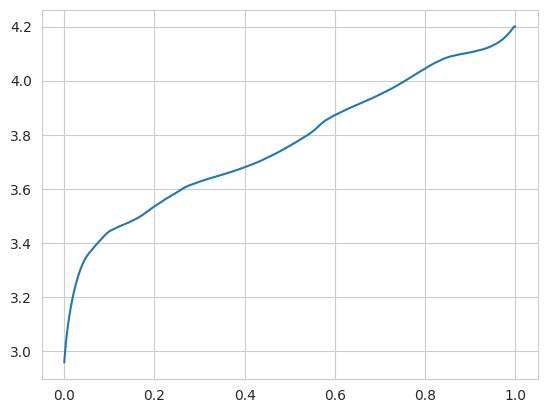

In [35]:
plt.plot(chgZ, chgV) # we use this graph for SOC less than 0.5

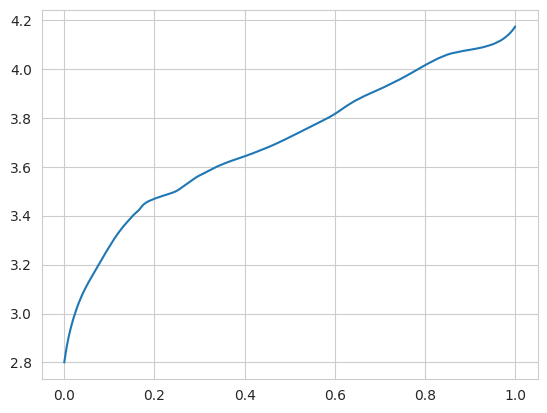

In [36]:
plt.plot(disZ, disV) # we use this graph for SOC greater than 0.5

In [37]:
print(dis_time)
print(chg_time)

[0.00000000e+00 6.00000000e+01 1.19999997e+02 ... 6.55800000e+04
 6.56400000e+04 6.56739999e+04]
[0.00000000e+00 5.99999980e+01 1.20000001e+02 ... 7.20600000e+04
 7.21200000e+04 7.21230001e+04]


The equivalent of MATLAB's `interp1` function in Python is **`scipy.interpolate.interp1d`** or **`numpy.interp`**.  

**Example 1: Using `numpy.interp` (Simple Linear Interpolation)**
```python
import numpy as np

# Define known data points
x = np.array([0, 1, 2, 3, 4])  # Known x-values
y = np.array([0, 2, 4, 6, 8])  # Known y-values

# Interpolate at new x values
x_new = np.array([0.5, 1.5, 2.5, 3.5])
y_new = np.interp(x_new, x, y)  # Linear interpolation

print(y_new)  # Output: [1. 3. 5. 7.]
```

 **Example 2: Using `scipy.interpolate.interp1d` (More Advanced Interpolation)**
```python
import numpy as np
from scipy.interpolate import interp1d

# Define known data points
x = np.array([0, 1, 2, 3, 4])
y = np.array([0, 2, 4, 6, 8])

# Create interpolation function (supports different methods)
interp_func = interp1d(x, y, kind='linear', fill_value="extrapolate")  

# Interpolate at new points
x_new = np.array([0.5, 1.5, 2.5, 3.5])
y_new = interp_func(x_new)

print(y_new)  # Output: [1. 3. 5. 7.]
```

**Interpolation Types (`kind` argument in `interp1d`)**
- `'linear'` (default) – Linear interpolation (like MATLAB's `interp1`)
- `'nearest'` – Nearest-neighbor interpolation
- `'cubic'` – Cubic spline interpolation
- `'quadratic'`, `'spline'`, `'pchip'`, `'polynomial'` – Various higher-order interpolations



In [38]:
import numpy as np
from scipy.interpolate import interp1d

deltaV50 = interp1d(chgZ, chgV)(0.5) - interp1d(disZ, disV)(0.5)
deltaV50

0.03845869313653605

- this computes the voltage difference between charge and discharge curves at 50% SOC.

- `interp1d(chgZ, chgV)(0.5)` finds the interpolated charge voltage at SOC = 0.5.

- `interp1d(disZ, disV)(0.5)` finds the interpolated discharge voltage at SOC = 0.5.

- Their difference `(deltaV50)` represents the hysteresis effect or IR drop.

In [ ]:
ind_chg = np.where(chgZ < 0.5)[0]
zChg, vChg = chgZ[ind_chg], chgV[ind_chg] - chgZ[ind_chg] * deltaV50  

ind_dis = np.where(disZ > 0.5)[0]
zDis, vDis = np.flipud(disZ[ind_dis]), np.flipud(disV[ind_dis] + (1 - disZ[ind_dis]) * deltaV50)

raw_ocv = interp1d(np.concatenate([zChg, zDis]), np.concatenate([vChg, vDis]), 
                   kind='linear', fill_value='extrapolate')(SOC)


- `ind = np.where(chgZ < 0.5)[0]` selects charge SOC values below 50%.

- `vChg` adjusts charge voltage `(chgV)` by subtracting a linear correction based on `chgZ` and `deltaV50`.

- This forces the charge voltage curve to pass through the midpoint of the charge-discharge hysteresis.


1. **Extract Charge Data (`zChg`, `vChg`):**  
   - Select charge SOC values `< 0.5`.
   - Adjust voltage `vChg` by shifting with `deltaV50`.

2. **Extract Discharge Data (`zDis`, `vDis`):**  
   - Select discharge SOC values `> 0.5`.
   - Apply the voltage correction using `deltaV50`.
   - `flipud()` ensures correct order for interpolation.

3. **Compute OCV (`raw_ocv`):**  
   - Use `interp1d` to interpolate voltage values across combined charge and discharge SOC ranges.
   - The result is an estimated **Open Circuit Voltage (OCV)**.

This efficiently reconstructs the **true OCV** curve by blending charge/discharge curves at **50% SOC**.

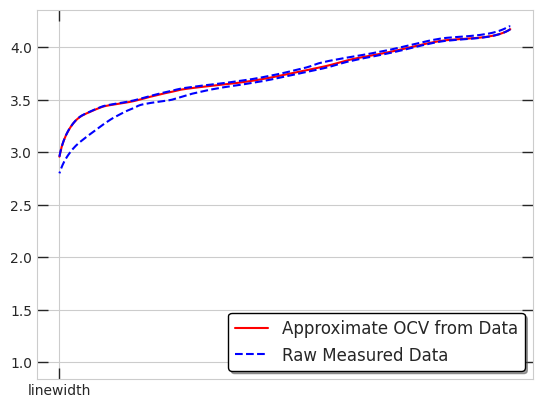

In [40]:
plt.plot(100*SOC,raw_ocv, 'r') # SOC vs OCV
plt.plot(100*disZ, disV,'b--', 'linewidth', 1); # raw data discharge voltage
plt.plot(100*chgZ, chgV,'b--','linewidth', 1)
plt.legend(
    ['Approximate OCV from Data', 'Raw Measured Data'], 
    loc='lower right', 
    fontsize=12, 
    frameon=True, 
    facecolor='white', 
    edgecolor='black', 
    fancybox=True, 
    shadow=True
)
plt.tick_params(
    axis='both',       # Apply to both x and y axes
    which='both',      # Apply to both major and minor ticks
    direction='in',    # Ticks point inward (scientific style)
    length=8,         # Adjust major tick length
    width=1,          # Adjust tick width
    top=True,         # Enable top x-axis ticks
    bottom=True,      # Enable bottom x-axis ticks
    left=True,        # Enable left y-axis ticks
    right=True        # Enable right y-axis ticks
)
plt.show()

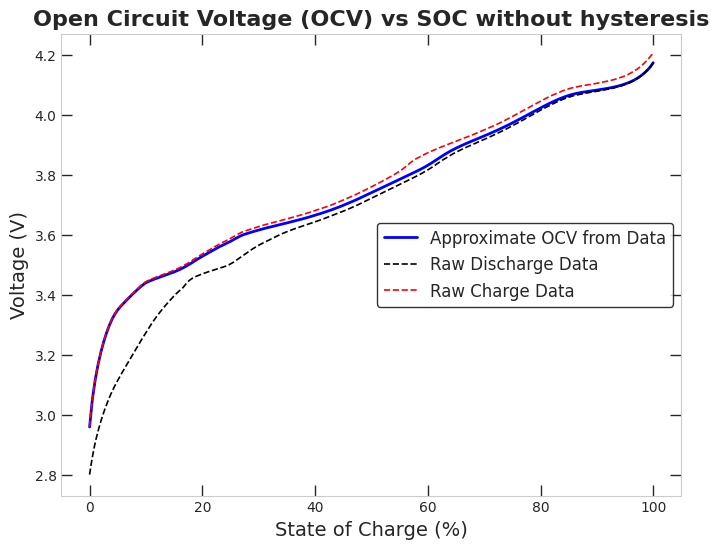

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Set figure size for better visibility

# Plot data with enhanced styles
plt.plot(100 * SOC, raw_ocv, label='Approximate OCV from Data', linewidth=2, color='b')
plt.plot(100 * disZ, disV, linestyle='--', linewidth=1.2, color='k', label='Raw Discharge Data')
plt.plot(100 * chgZ, chgV, linestyle='--', linewidth=1.2, color='r', label='Raw Charge Data')

# Add grid for readability
#plt.grid(visible=True, which='major', linestyle='-', linewidth=0.8, alpha=0.8)  # Solid major grid
#plt.grid(visible=True, which='minor', linestyle=':', linewidth=0.5, alpha=0.5)  # Dotted minor grid


plt.tick_params(
    axis='both',       # Apply to both x and y axes
    which='both',      # Apply to both major and minor ticks
    direction='in',    # Ticks point inward (scientific style)
    length=8,         # Adjust major tick length
    width=1,          # Adjust tick width
    top=True,         # Enable top x-axis ticks
    bottom=True,      # Enable bottom x-axis ticks
    left=True,        # Enable left y-axis ticks
    right=True        # Enable right y-axis ticks
)

#plt.minorticks_on()  # Enable minor ticks for finer resolution
plt.grid(False) 

# Labels and title
plt.xlabel('State of Charge (%)', fontsize=14)
plt.ylabel('Voltage (V)', fontsize=14)
plt.title('Open Circuit Voltage (OCV) vs SOC without hysteresis', fontsize=16, fontweight='bold')

# Improved legend styling
plt.legend(
    loc='center right',
    fontsize=12,
    frameon=True,
    facecolor='white',
    edgecolor='black',
    fancybox=True,
    
)

# Show the plot
plt.show()


**Use the SOC versus OCV data now available at each individual
temperature to compute an OCV0 and OCVrel relationship**

# 5. Steps to find teh OCV vs SOC model using ordinary least squares
- Process all temperatures to find raw OCV relationship,  Everything that follows is same as at 25 degC.

## OCV and SOC
- OCV is equal to terminal voltage when disconnected(open)
- OCV is a function of SOC(State of Charge)
- OCV does not include I*R drop due to current flow nor time dependent effects
- OCV is also a function of temperature
- OCV is key to SOC estimation(ground truth)
- OCV is subject to hysteresis
  
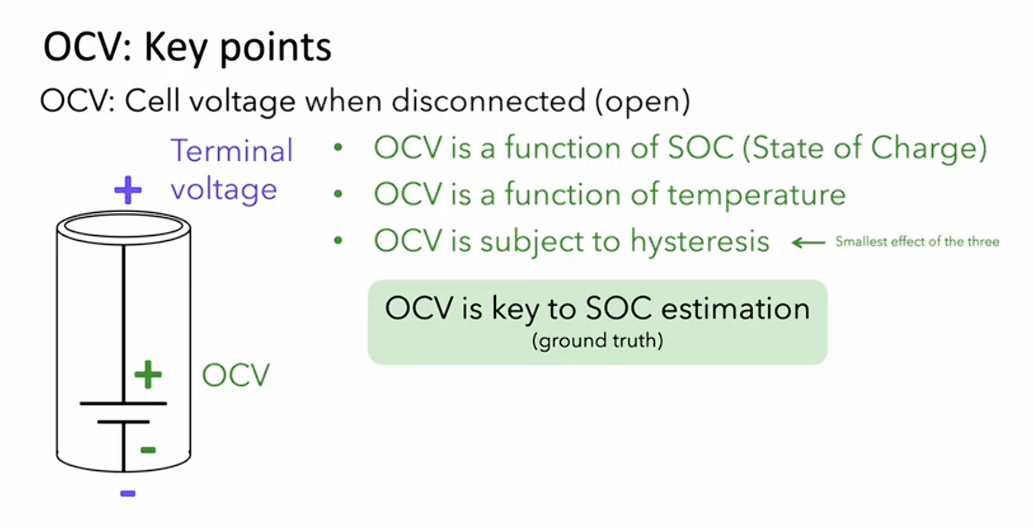
_source:https://www.youtube.com/watch?v=4e63NhYc5Mo&t=193s_

## OCV and Hysteresis
- **Hysteresis** is the difference between OCV curves in **charge** versus in **discharge**
- Hysteresis charges SOC chages

## Cell impedance
- OCV does not include IR drop due to current flow


If, $R_0 = (15 m\Omega)$, $I_{load} = 9A$ and OCV = 4.2V then,

$V_{term} = OCV - (9A) \times (15 m\Omega) = 4.2V - 0.135V = 4.065V$

- Terminal Voltage changes with current(as we apply larger currents voltage is lowered)
- R0 models electrolyte resistance and contact resistance
- 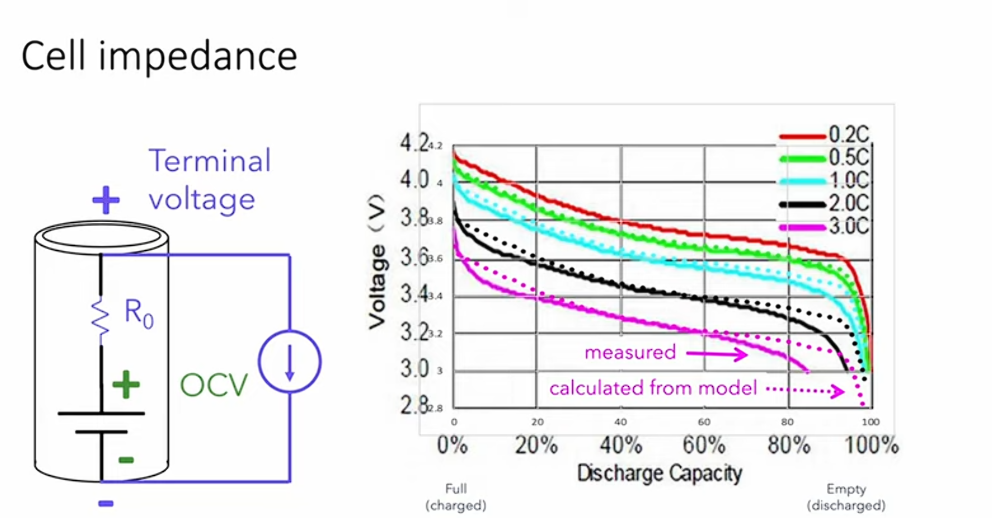

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import json
from pathlib import Path
#from models import BatteryData, FileData, ModelOcv
#from funcs import OCVfromSOCtemp


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/lg-hg2-18650-sn62a4-hppc-ocv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/lg-hg2-18650-sn62a4-hppc-ocv/hppc/LGDBHG21865_DYN_N10.csv
/kaggle/input/lg-hg2-18650-sn62a4-hppc-ocv/hppc/LGDBHG21865_DYN_N20.csv
/kaggle/input/lg-hg2-18650-sn62a4-hppc-ocv/hppc/LGDBHG21865_DYN_P10.csv
/kaggle/input/lg-hg2-18650-sn62a4-hppc-ocv/hppc/LGDBHG21865_DYN_P25.csv
/kaggle/input/lg-hg2-18650-sn62a4-hppc-ocv/hppc/LGDBHG21865_DYN_P40.csv
/kaggle/input/lg-hg2-18650-sn62a4-hppc-ocv/hppc/LGDBHG21865_DYN_P00.csv
/kaggle/input/lg-hg2-18650-sn62a4-hppc-ocv/ocv/LGDBHG21865_OCV_N10.csv
/kaggle/input/lg-hg2-18650-sn62a4-hppc-ocv/ocv/LGDBHG21865_OCV_P25.csv
/kaggle/input/lg-hg2-18650-sn62a4-hppc-ocv/ocv/LGDBHG21865_OCV_N20.csv
/kaggle/input/lg-hg2-18650-sn62a4-hppc-ocv/ocv/LGDBHG21865_OCV_P40.csv
/kaggle/input/lg-hg2-18650-sn62a4-hppc-ocv/ocv/LGDBHG21865_OCV_P00.csv
/kaggle/input/lg-hg2-18650-sn62a4-hppc-ocv/ocv/LGDBHG21865_OCV_P10.csv


In [43]:
Main_Path = "/kaggle/input/lg-hg2-18650-sn62a4-hppc-ocv/"

In [44]:
import pandas as pd

class BatteryScript:
    """
    Script or experiment performed on the battery cell.
    """

    def __init__(self, csvdata):
        """
        Initialize the script measurements.
        """
        df = pd.read_csv(csvdata, skiprows=30)
        df.columns = [
            "Time Stamp",
            "Step",
            "Status",
            "Prog Time",
            "Step Time",
            "Cycle",
            "Cycle Level",
            "Procedure",
            "Voltage",
            "Current",
            "Temperature",
            "Capacity",
            "WhAccu",
            "Cnt",
            "Empty",
        ]

        # Fix for referencing the correct column names
        df["Capacity"] = pd.to_numeric(df["Capacity"], errors="coerce")  # Ensure numeric values
        df["Voltage"] = pd.to_numeric(df["Voltage"], errors="coerce")  

        max_discharge = abs(df["Capacity"].min())  # Find max discharge

        # Corrected filtering logic
        self.disAh = abs(df.loc[df["Step"].isin([22, 23]), "Capacity"]).values
        self.chgAh = (max_discharge + df.loc[df["Step"].isin([23, 24, 25]), "Capacity"]).values

        self.disStep = df.loc[df["Step"].isin([22, 23]), "Step"].values
        self.chgStep = df.loc[df["Step"].isin([23, 24, 25]), "Step"].values
        
        self.disV = df.loc[df["Step"].isin([22, 23]), "Voltage"].values
        self.chgV = df.loc[df["Step"].isin([23, 24, 25]), "Voltage"].values

class BatteryData:
    """
    Object to store battery measurements from script or experiment for a
    certain temperature.
    """

    def __init__(self, csvfiles):
        """
        Initialize with list of CSV data files.
        """
        self.s1 = BatteryScript(csvfiles[0]) 
        

class FileData:
    """
    Calculated data from file.
    """

    def __init__(self, disV, disZ, chgV, chgZ, rawocv, temp):
        self.disV = disV
        self.disZ = disZ
        self.chgV = chgV
        self.chgZ = chgZ
        self.rawocv = rawocv
        self.temp = temp


class ModelOcv:
    """
    Model representing OCV results.
    """

    def __init__(self, OCV0, OCVrel, SOC, OCV, SOC0, SOCrel, OCVeta, OCVQ):
        self.OCV0 = OCV0
        self.OCVrel = OCVrel
        self.SOC = SOC
        self.OCV = OCV
        self.SOC0 = SOC0
        self.SOCrel = SOCrel
        self.OCVeta = OCVeta
        self.OCVQ = OCVQ


In [45]:
"""
OCV model
"""
import numpy as np
import os

# Parameters and Data
# ------------------------------------------------------------------------------
Main_Path = "/kaggle/input/lg-hg2-18650-sn62a4-hppc-ocv/"
temps = np.array([-20, -10, 0, 10, 25, 40])  # Temperatures for cell experiments

minV = 2.0  # Minimum cell voltage for plotting
maxV = 4.2  # Maximum cell voltage for plotting

SOC = np.arange(0, 1+0.005, 0.005).round(decimals=3)  # SOC range

# initialize variables to store calculations
eta = np.zeros(len(temps))  # coulombic efficiency
Q = np.zeros(len(temps))    # apparent total capacity


# Initialize array to store battery cell data
data = np.zeros(len(temps), dtype=object)

# Load battery cell data for each temperature as objects then store in data array
for idx, temp in enumerate(temps):
    Path = os.path.join(Main_Path, "ocv/")  # Corrected path

    tempfmt = f'{abs(temp):02}'  # Format temperature as two digits

    if temp < 0:
        files = [os.path.join(Path, f'LGDBHG21865_OCV_N{tempfmt}.csv')]
    else:
        files = [os.path.join(Path, f'LGDBHG21865_OCV_P{tempfmt}.csv')] 

    data[idx] = BatteryData(files)  # Ensure BatteryData is properly defined elsewhere

# Initialize array to store calculated data
filedata = np.zeros(len(temps), dtype=object)


In [46]:
Path

'/kaggle/input/lg-hg2-18650-sn62a4-hppc-ocv/ocv/'

In [47]:
# Process 25 degC data to find raw OCV relationship and eta25
# ------------------------------------------------------------------------------

k, = np.where(temps == 25)[0]   # index where temperature is 25 degC
p25 = data[k]


In [48]:
# compute total discharge in ampere hours, Ah
DisAh = p25.s1.disAh 
totDisAh = DisAh[-1] 
# compute total charge in ampere hours, Ah
ChgAh = p25.s1.chgAh
totChgAh = ChgAh[-1]

In [49]:
# the 25 degC coulombic efficiency
eta25 = totDisAh/totChgAh
eta[k] = eta25
print(eta[k])

0.9359798582266893


In [50]:

# adjust charge Ah in all scripts per eta25
p25.s1.chgAh = p25.s1.chgAh * eta25


# compute cell capacity at 25 degC, should be essentially same at
# all temps, but we're computing them individually to check this
Q25 = p25.s1.disAh[-1]
Q[k] = Q25
print(Q[k])

2.78074


> We are limited here as we are **unable to find the i*R voltage drop at beginning of discharge** 

In [51]:
# discharge
indD = np.where(p25.s1.disStep == 22)[0]                  # slow discharge step
#IR1Da = p25.s1.disV[indD[0]-1] - p25.s1.disV[indD[0]]     # the i*R voltage drop at beginning of discharge
IR2Da = p25.s1.disV[indD[-1]+1] - p25.s1.disV[indD[-1]]   # the i*R voltage drop at end of discharge

# charge
indC = np.where(p25.s1.chgStep == 24)[0]                  # slow charge step
IR1Ca = p25.s1.chgV[indC[0]] - p25.s1.chgV[indC[0]-1]     # the i*R voltage rise at beginning of charge
IR2Ca = p25.s1.chgV[indC[-1]] - p25.s1.chgV[indC[-1]+1]   # the i*R voltage rise at end of charge
#print(IR1Da)
print(IR2Da)
print(IR1Ca)
print(IR2Ca)

0.030100000000000016
0.029659999999999798
0.0025300000000001432


In [52]:
# put bounds on R
IR1D = 2*IR2Ca
IR2D = min(IR2Da, 2*IR1Ca)
IR1C = min(IR1Ca, 2*IR2Da)
IR2C = IR2Ca
print(IR1D,IR2D,IR1C,IR2C)

0.0050600000000002865 0.030100000000000016 0.029659999999999798 0.0025300000000001432


In [53]:

# discharge
blendD = np.linspace(0, 1, len(indD))   # linear blending from 0 to 1 for discharge
IRblendD = IR1D + (IR2D - IR1D)*blendD  # blend resistances for discharge
disV = p25.s1.disV[indD] + IRblendD  # approximate discharge voltage at each point
disZ = 1 - p25.s1.disAh[indD]/Q25       # approximate SOC at each point
disZ = disZ + (1 - disZ[0])

# charge
blendC = np.linspace(0, 1, len(indC))   # linear blending from 0 to 1 for charge
IRblendC = IR1C + (IR2C - IR1C)*blendC  # blend resistances for charge
chgV = p25.s1.chgV[indC] - IRblendC  # approximate charge voltage at each point
chgZ = p25.s1.chgAh[indC]/Q25           # approximate SOC at each point
chgZ = chgZ - chgZ[0]

# compute voltage difference between charge and discharge at 50% SOC force i*R
# compensated curve to pass half-way between each charge and discharge at this
# point notice that vector chgZ and disZ must be increasing
deltaV50 = np.interp(0.5, chgZ, chgV) - np.interp(0.5, disZ[::-1], disV[::-1])
ind = np.where(chgZ < 0.5)[0]
vChg = chgV[ind] - chgZ[ind]*deltaV50
zChg = chgZ[ind]
ind = np.where(disZ > 0.5)[0]
vDis = disV[ind] + (1 - disZ[ind])*deltaV50
zDis = disZ[ind]

# rawocv now has our best guess of true ocv at this temperature
rawocv = np.interp(SOC, np.concatenate([zChg, zDis[::-1]]), np.concatenate([vChg, vDis[::-1]]))

# store calculated data into filedata object
filedata[k] = FileData(p25.s1.disV[indD], disZ, p25.s1.chgV[indC], chgZ, rawocv, temps[k])

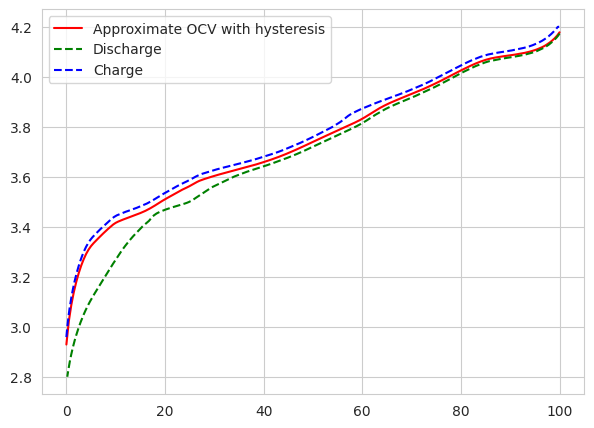

In [54]:
plt.figure(figsize=(7, 5))  # Define figure size
plt.plot(100 * SOC, filedata[k].rawocv, 'r', label='Approximate OCV with hysteresis')
plt.plot(100 * filedata[k].disZ, filedata[k].disV, 'g--', label='Discharge')
plt.plot(100 * filedata[k].chgZ, filedata[k].chgV, 'b--', label='Charge')
plt.legend()
plt.show()

## All other temperatures

**Test** At temperature `T degC`, We **have experimental data** for:

- `discharge` at C/20 rate until cell terminal voltage equal manufacturer specified $v_{min}$ and

- `charge` the cell at a constant-current rate of c/20 untill the cell teriminal voltage equals $v_{max}$ 

**Rest** At temperature `25degC`, We **don't have experimental data** for: After `discharge` at temperature _T degC_

- if the cell voltage is below $v_{min}$, then we had to charge the cell at a c/20 rate untill the voltage is equal to $v_{min}$.

- if the cell voltage is above $v_{min}$, then we had to discharge the cell at a c/20 rate untill the voltage is equal to $v_{min}$.

**Rest** At temperature `25degC`, We **don't have experimental data** for: After `charge` at temperature _T degC_

- if the cell voltage is below $v_{max}$, then we had to charge the cell at a c/20 rate untill the voltage is equal to $v_{max}$.

- if the cell voltage is above $v_{max}$, then we had to discharge the cell at a c/20 rate untill the voltage is equal to $v_{max}$.


Thus, we only consider the Test temperature data for modelling coulombic efficiencies due to data unavilability.


In [55]:
# Process Other Temperatures to Find Raw OCV Relationship and Eta
# Everything that follows is same as at 25 degC, except we need to compensate
# for different coulombic efficiencies eta at different temperatures.
# ------------------------------------------------------------------------------

not25, = np.where(temps != 25)

for k in not25:
    
    # coulombic efficiency
    eta[k] = (data[k].s1.disAh[-1]) / (data[k].s1.chgAh[-1])


    # adjust charge Ah per eta at current temp
    data[k].s1.chgAh = data[k].s1.chgAh * eta[k]
    

    # compute cell capacity
    Q[k] = data[k].s1.disAh[-1]

    # discharge
    indD = np.where(data[k].s1.disStep == 22)[0]                           # slow discharge step
    #IR1D = data[k].s1.voltage[indD[0]-1] - data[k].s1.voltage[indD[0]]      # the i*R voltage drop at beginning of discharge
    IR2D = data[k].s1.disV[indD[-1]+1] - data[k].s1.disV[indD[-1]]         # the i*R voltage drop at end of discharge

    # charge
    indC = np.where(data[k].s1.chgStep == 24)[0]                             # slow charge step
    IR1C = data[k].s1.chgV[indC[0]] - data[k].s1.chgV[indC[0]-1]   # the i*R voltage rise at beginning of charge
    IR2C = data[k].s1.chgV[indC[-1]] - data[k].s1.chgV[indC[-1]+1] # the i*R voltage rise at end of charge

    # put bounds on R
    IR1D = 2*IR2C
    IR2D = min(IR2D, 2*IR1C)
    IR1C = min(IR1C, 2*IR2D)
    IR2C = IR2C

    # discharge
    blend = np.linspace(0, 1, len(indD))        # linear blending from 0 to 1 for discharge
    IRblend = IR1D + (IR2D - IR1D)*blend        # blend resistances for discharge
    disV = data[k].s1.disV[indD] + IRblend   # approximate discharge voltage at each point
    disZ = 1 - data[k].s1.disAh[indD]/Q25       # approximate SOC at each point
    disZ = disZ + (1 - disZ[0])

    # charge
    blend = np.linspace(0, 1, len(indC))        # linear blending from 0 to 1 for charge
    IRblend = IR1C + (IR2C - IR1C)*blend        # blend resistances for charge
    chgV = data[k].s1.chgV[indC] - IRblend   # approximate charge voltage at each point
    chgZ = data[k].s1.chgAh[indC]/Q25           # approximate SOC at each point
    chgZ = chgZ - chgZ[0]

    # compute voltage difference between charge and discharge at 50% SOC force i*R
    # compensated curve to pass half-way between each charge and discharge at this
    # point notice that vector chgZ and disZ must be increasing
    deltaV50 = np.interp(0.5, chgZ, chgV) - np.interp(0.5, disZ[::-1], disV[::-1])
    ind = np.where(chgZ < 0.5)[0]
    vChg = chgV[ind] - chgZ[ind]*deltaV50
    zChg = chgZ[ind]
    ind = np.where(disZ > 0.5)[0]
    vDis = disV[ind] + (1 - disZ[ind])*deltaV50
    zDis = disZ[ind]

    # rawocv now has our best guess of true ocv at this temperature
    rawocv = np.interp(SOC, np.concatenate([zChg, zDis[::-1]]), np.concatenate([vChg, vDis[::-1]]))

    # store calculated data into filedata object
    filedata[k] = FileData(data[k].s1.disV[indD], disZ, data[k].s1.chgV[indC], chgZ, rawocv, temps[k])

## Plotting OCV vs SOC approximate curve with raw charge and discharge data for all temperature 

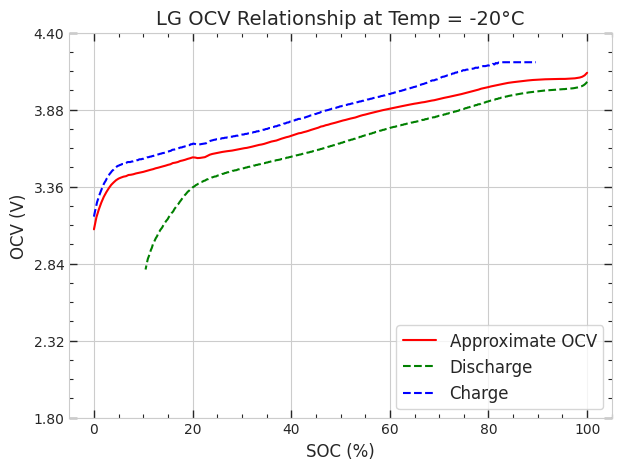

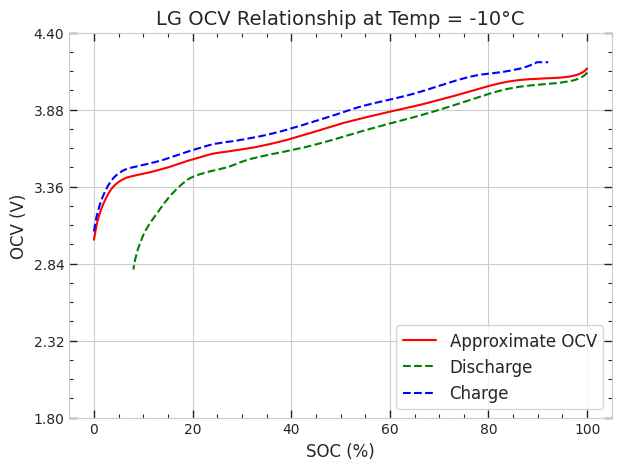

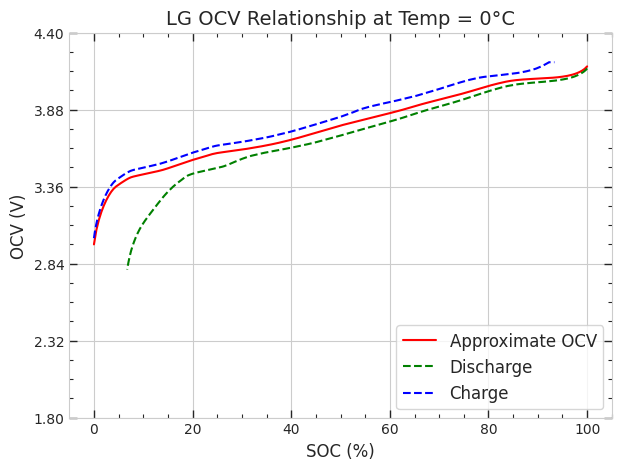

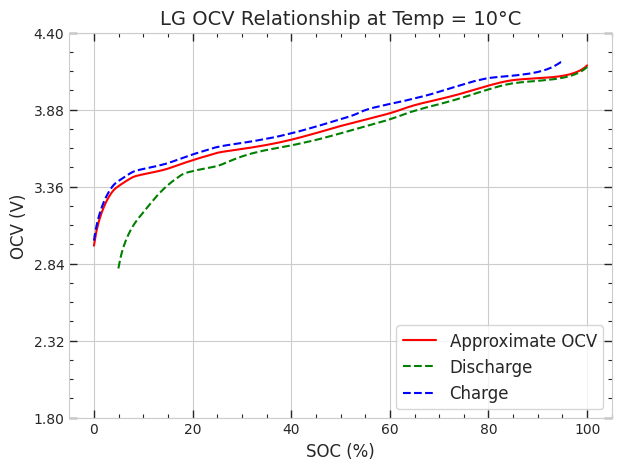

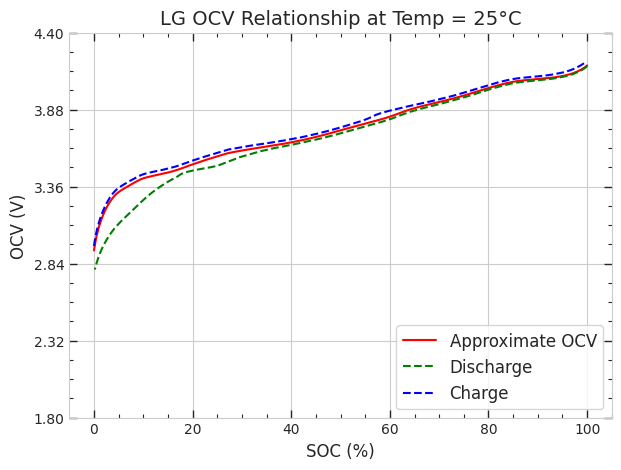

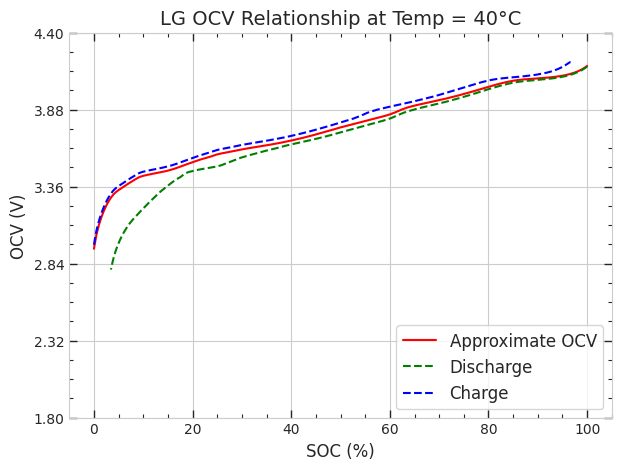

In [56]:

for k, temp in enumerate(temps):
    #err = filedata[k].rawocv - OCVfromSOCtemp(SOC, filedata[k].temp, modelocv)
    #rmserr = np.sqrt(np.mean(err**2))

    plt.figure(figsize=(7, 5))  # Define figure size
    #plt.plot(100 * SOC, OCVfromSOCtemp(SOC, filedata[k].temp, modelocv), 'k', label='Model')
    plt.plot(100 * SOC, filedata[k].rawocv, 'r', label='Approximate OCV')
    plt.plot(100 * filedata[k].disZ, filedata[k].disV, 'g--', label='Discharge')
    plt.plot(100 * filedata[k].chgZ, filedata[k].chgV, 'b--', label='Charge')

    # RMS error text
    #plt.text(2, maxV - 0.15, f'RMS Error = {rmserr*1000:.01f} mV', fontsize=12)

    # Axis limits and labels
    plt.ylim(minV - 0.2, maxV + 0.2)
    plt.xlabel('SOC (%)', fontsize=12)
    plt.ylabel('OCV (V)', fontsize=12)
    plt.title(f'LG OCV Relationship at Temp = {temp}°C', fontsize=14)

    # Ticks and grid styling
    plt.xticks(np.linspace(0, 100, 6))
    plt.yticks(np.linspace(minV - 0.2, maxV + 0.2, 6))
    plt.minorticks_on()
    plt.tick_params(axis='both', which='major', direction='in', length=6, width=1, top=True, bottom=True, left=True, right=True)
    plt.tick_params(axis='both', which='minor', direction='in', length=3, width=0.8, top=True, bottom=True, left=True, right=True)

    # Legend
    plt.legend(loc='lower right', fontsize=12, frameon=True)


# 6. Developing R-int Model

- Now, we deep dive into implementing a model to estimate the approximate OCV curve using very simple model also known as R_int model

 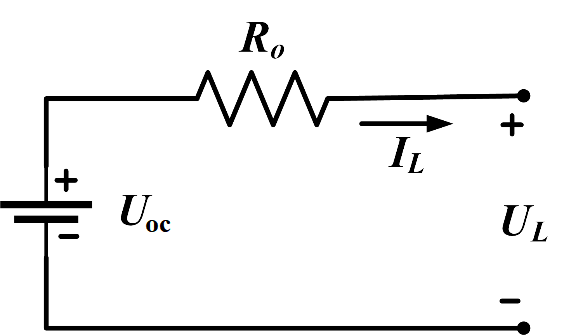

## linear least squares to determine best guess for OCV at 0 degC

In [57]:
# Use the SOC versus OCV data now available at each individual
# temperature to compute an OCV0 and OCVrel relationship
# ------------------------------------------------------------------------------

# compile the voltages and temperatures into single arrays rather than structures
postemps = temps[temps > 0]     # temps > 0
numtempskept = len(postemps)    # number of temps > 0

nocv = len(filedata[5].rawocv)          # number of rawocv values based on 25 degC results
Vraw = np.zeros([numtempskept, nocv])   # initialize rawocv array
idxpos = np.where(temps > 0)[0]         # indices of positive file temperatures

for k in range(numtempskept):
    Vraw[k] = filedata[idxpos[k]].rawocv

# use linear least squares to determine best guess for OCV at 0 degC
# and then the per-degree OCV change
OCV0 = np.zeros(len(SOC))
OCVrel = np.zeros(len(SOC))
H = np.ones([numtempskept, 2])
H[:, 1] = postemps

for k in range(len(SOC)):
    X = np.linalg.lstsq(H, Vraw[:, k], rcond=None)
    OCV0[k] = X[0][0]
    OCVrel[k] = X[0][1]

modelocv = ModelOcv(OCV0, OCVrel, SOC, 0, 0, 0, 0, 0)

In [58]:
"""
Functions used by OCV model
"""

import numpy as np


def OCVfromSOCtemp(soc, temp, model):
    soccol = soc             # force soc to be column vector 
    SOC = model.SOC          # force to be column vector
    OCV0 = model.OCV0        # force to be column vector
    OCVrel = model.OCVrel    # force to be column vector
    
    tempcol = temp * np.ones(len(soccol))
    
    diffSOC = SOC[1] - SOC[0]           # spacing between SOC points - assume uniform
    ocv = np.zeros(len(soccol))         # initialize output to zero
    I1, = np.where(soccol <= SOC[0])    # indices of socs below model-stored data
    I2, = np.where(soccol >= SOC[-1])   # and of socs above model-stored data
    I3, = np.where((soccol > SOC[0]) & (soccol < SOC[-1]))   # the rest of them
    I6 = np.isnan(soccol)               # if input is "not a number" for any locations

    # for voltages less than lowest stored soc datapoint, extrapolate off 
    # low end of table 
    if len(I1) != 0:
        dv = (OCV0[1] + tempcol*OCVrel[1]) - (OCV0[0] + tempcol*OCVrel[0])
        ocv[I1] = (soccol[I1] - SOC[0])*dv[I1]/diffSOC + OCV0[0] + tempcol[I1]*OCVrel[0]

    # for voltages greater than highest stored soc datapoint, extrapolate off
    # high end of table
    if len(I2) != 0:
        dv = (OCV0[-1] + tempcol*OCVrel[-1]) - (OCV0[-2] + tempcol*OCVrel[-2])
        ocv[I2] = (soccol[I2] - SOC[-1])*dv[I2]/diffSOC + OCV0[-1] + tempcol[I2]*OCVrel[-1]

    # for normal soc range, manually interpolate (10x faster than "interp1")
    I4 = (soccol[I3] - SOC[0])/diffSOC  # using linear interpolation
    I5 = np.floor(I4)
    I5 = I5.astype(int)
    I45 = I4 - I5
    omI45 = 1 - I45
    ocv[I3] = OCV0[I5]*omI45 + OCV0[I5+1]*I45
    ocv[I3] = ocv[I3] + tempcol[I3]*(OCVrel[I5]*omI45 + OCVrel[I5+1]*I45)
    ocv[I6] = 0     # replace NaN SOCs with zero voltage
    return ocv


In [59]:
# Make SOC0 and SOCrel
# Do same kind of analysis to find soc as a function of ocv
# ------------------------------------------------------------------------------

z = np.arange(-0.1, 1.1, 0.01)     # test soc vector
v = np.arange(minV-0.01, maxV+0.02, 0.01).round(decimals=2)
socs = np.zeros((len(temps), len(v)))

for k, _ in enumerate(temps):
    T = temps[k]
    v1 = OCVfromSOCtemp(z, T, modelocv)
    socs[k, :] = np.interp(v, v1, z)

SOC0 = np.zeros(len(v))
SOCrel = SOC0
H = np.ones([len(temps), 2])
H[:, 1] = temps

for k in range(len(v)):
    X = np.linalg.lstsq(H, socs[:, k], rcond=None)  # fit SOC(v,T) = 1*SOC0(v) + T*SOCrel(v)
    SOC0[k] = X[0][0]
    SOCrel[k] = X[0][1]

# store ocv results in model object
# ------------------------------------------------------------------------------
modelocv = ModelOcv(OCV0, OCVrel, SOC, v, SOC0, SOCrel, eta, Q)

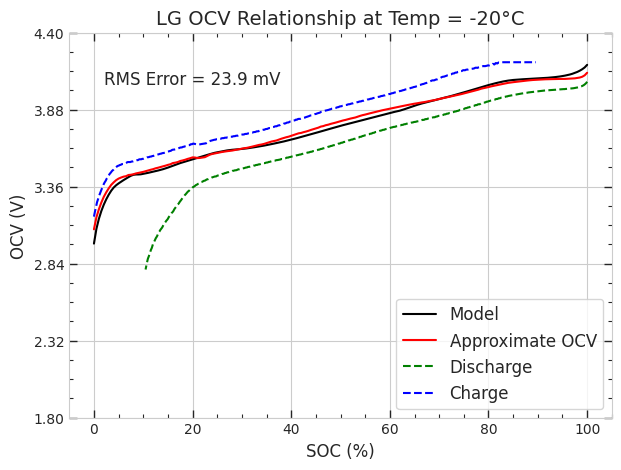

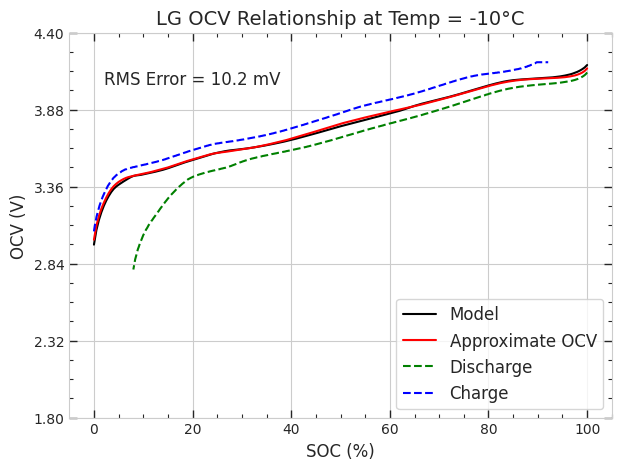

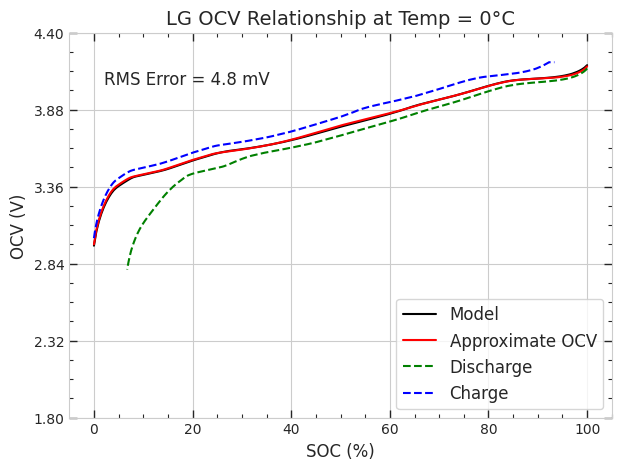

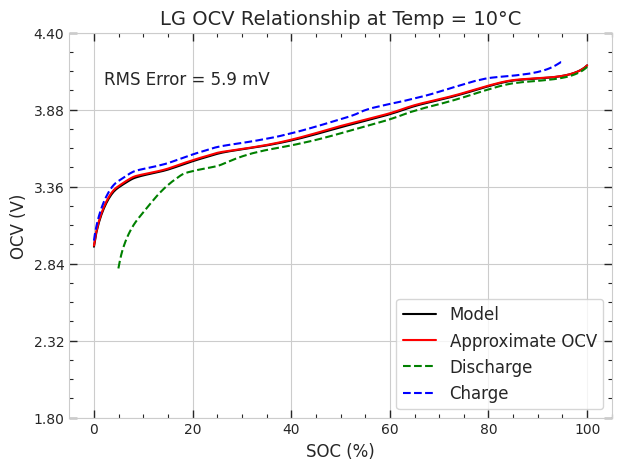

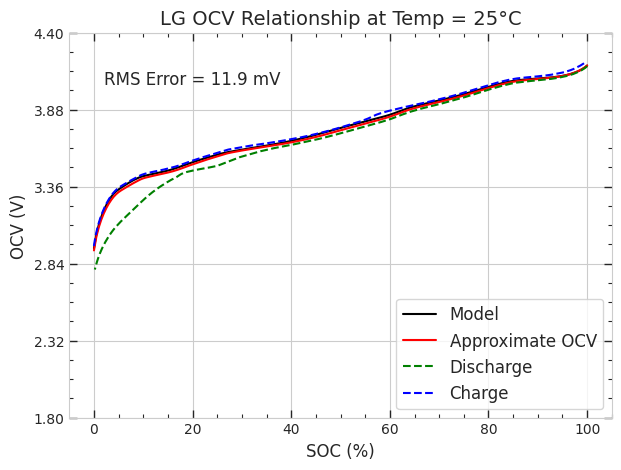

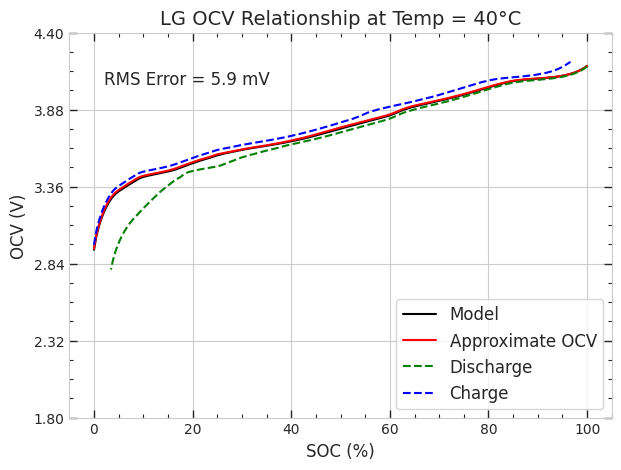

In [60]:

# Plot Results
# ------------------------------------------------------------------------------

plt.close('all')
plt.ion()


for k, temp in enumerate(temps):
    err = filedata[k].rawocv - OCVfromSOCtemp(SOC, filedata[k].temp, modelocv)
    rmserr = np.sqrt(np.mean(err**2))

    plt.figure(figsize=(7, 5))  # Define figure size
    plt.plot(100 * SOC, OCVfromSOCtemp(SOC, filedata[k].temp, modelocv), 'k', label='Model')
    plt.plot(100 * SOC, filedata[k].rawocv, 'r', label='Approximate OCV')
    plt.plot(100 * filedata[k].disZ, filedata[k].disV, 'g--', label='Discharge')
    plt.plot(100 * filedata[k].chgZ, filedata[k].chgV, 'b--', label='Charge')

    # RMS error text
    plt.text(2, maxV - 0.15, f'RMS Error = {rmserr*1000:.01f} mV', fontsize=12)

    # Axis limits and labels
    plt.ylim(minV - 0.2, maxV + 0.2)
    plt.xlabel('SOC (%)', fontsize=12)
    plt.ylabel('OCV (V)', fontsize=12)
    plt.title(f'LG OCV Relationship at Temp = {temp}°C', fontsize=14)

    # Ticks and grid styling
    plt.xticks(np.linspace(0, 100, 6))
    plt.yticks(np.linspace(minV - 0.2, maxV + 0.2, 6))
    plt.minorticks_on()
    plt.tick_params(axis='both', which='major', direction='in', length=6, width=1, top=True, bottom=True, left=True, right=True)
    plt.tick_params(axis='both', which='minor', direction='in', length=3, width=0.8, top=True, bottom=True, left=True, right=True)

    # Legend
    plt.legend(loc='lower right', fontsize=12, frameon=True)

    # Save the figure
    #plt.savefig(f'OCV_plot_temp_{temp}.png', dpi=300, bbox_inches='tight')  # High-quality image

    plt.show()  # Close the figure to avoid memory issues


# convert model object to dict, then save in JSON to disk
# ------------------------------------------------------------------------------
#if True:
#    modelocv = {k:v.tolist() for k,v in modelocv.__dict__.items() if isinstance(v, np.ndarray)}
#    with open('modelocv.json', 'w') as json_file:
#        json.dump(modelocv, json_file, indent=4)



# 7. HPPC data processing and visualization

## Time Vs Voltage plots for visualization of data

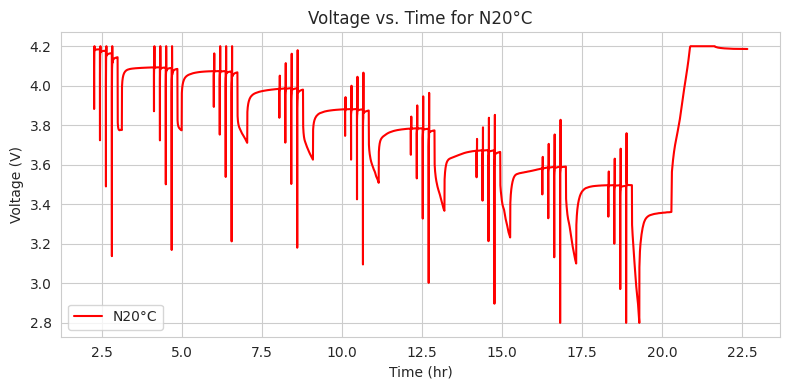

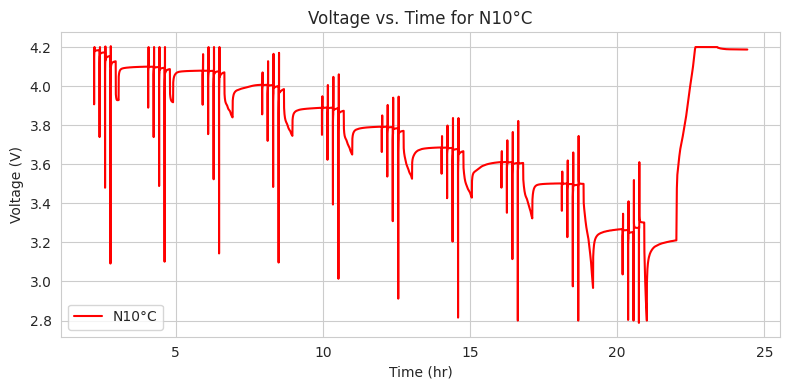

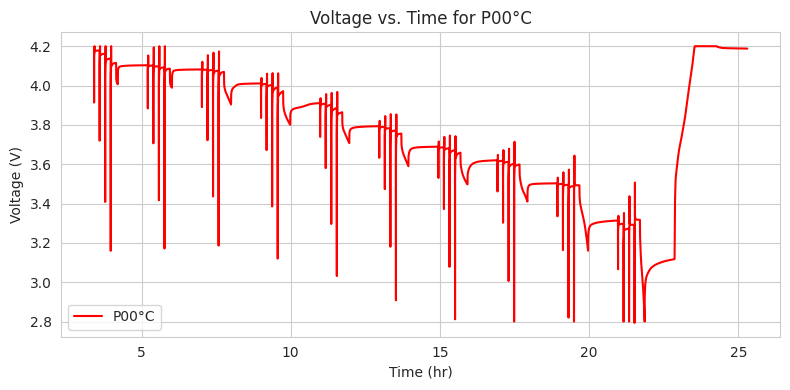

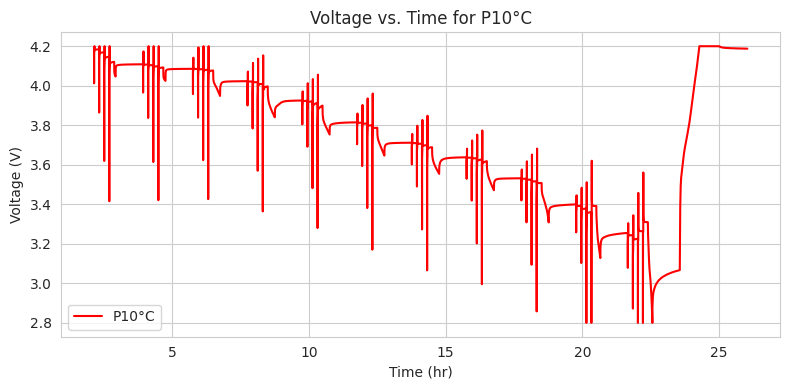

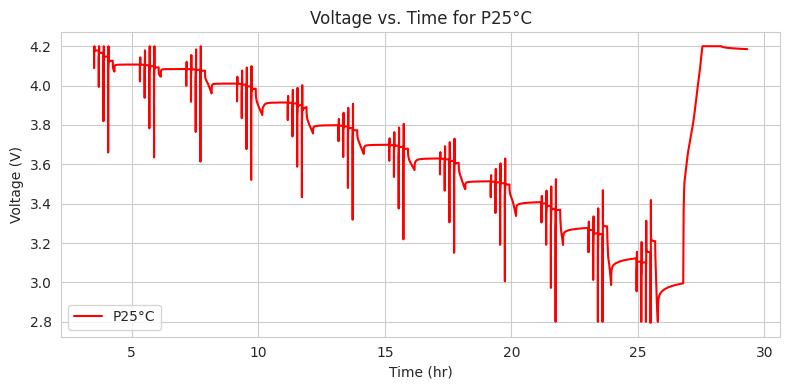

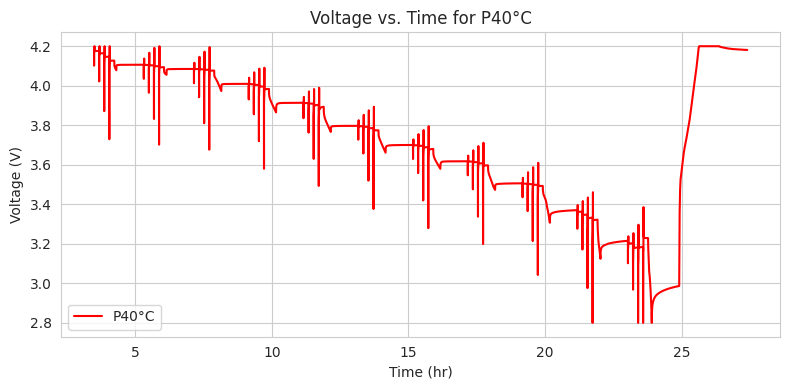

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import timedelta

def time_string_to_seconds(input_string: str) -> float:
    time_parts = input_string.split(":")
    second_parts = time_parts[2].split(".")
    return timedelta(
        hours=int(time_parts[0]),
        minutes=int(time_parts[1]),
        seconds=int(second_parts[0]),
        microseconds=int(second_parts[1]) * 1000,  # Convert to microseconds
    ).total_seconds()

# Define paths
Main_Path = "/kaggle/input/lg-hg2-18650-sn62a4-hppc-ocv/"
Path = os.path.join(Main_Path, "hppc/")

# Define temperature labels
temps = ['N20', 'N10', 'P00', 'P10', 'P25', 'P40']  # temperatures

# Loop through each temperature dataset
for temp in temps:
    file = os.path.join(Path, f'LGDBHG21865_DYN_{temp}.csv')
    
    # Read CSV file
    df = pd.read_csv(file, skiprows=30)
    df.columns = [
        "Time Stamp", "Step", "Status", "Prog Time", "Step Time", "Cycle", "Cycle Level", "Procedure",
        "Voltage", "Current", "Temperature", "Capacity", "WhAccu", "Cnt", "Empty"
    ]

    # Convert "Prog Time" to seconds
    df["Time (s)"] = df["Prog Time"].astype(str).apply(time_string_to_seconds)

    # Extract voltage and time
    voltage = df["Voltage"]
    time = df["Time (s)"]

    # Plot voltage vs. time
    fig, ax1 = plt.subplots(figsize=(8, 4))
    ax1.plot(time/3600, voltage, color='red', label=f'{temp}°C')
    ax1.set_xlabel("Time (hr)")
    ax1.set_ylabel("Voltage (V)")
    ax1.set_title(f"Voltage vs. Time for {temp}°C")
    ax1.legend()
    plt.tight_layout()
    
    # Save each plot
    #plt.savefig(f'Voltage_vs_Time_{temp}.png', dpi=300)
    
    plt.show()  # Show the plot


In [62]:
print(Path)
print(file)

/kaggle/input/lg-hg2-18650-sn62a4-hppc-ocv/hppc/
/kaggle/input/lg-hg2-18650-sn62a4-hppc-ocv/hppc/LGDBHG21865_DYN_P40.csv


## Time Vs Current plots for visualization of data

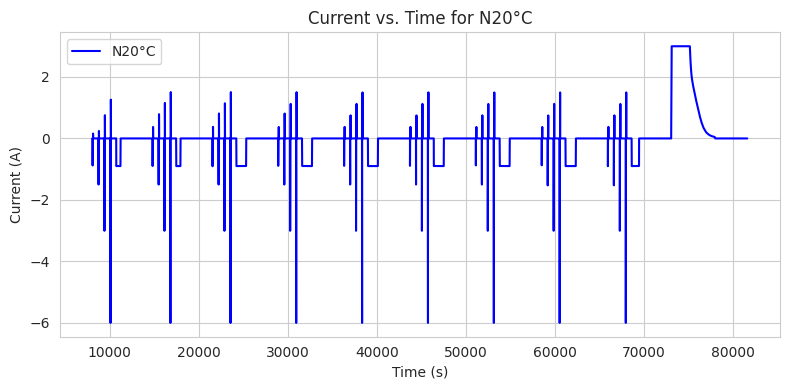

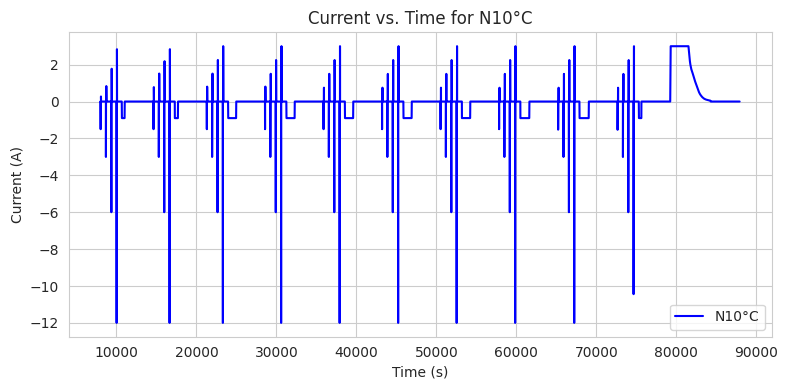

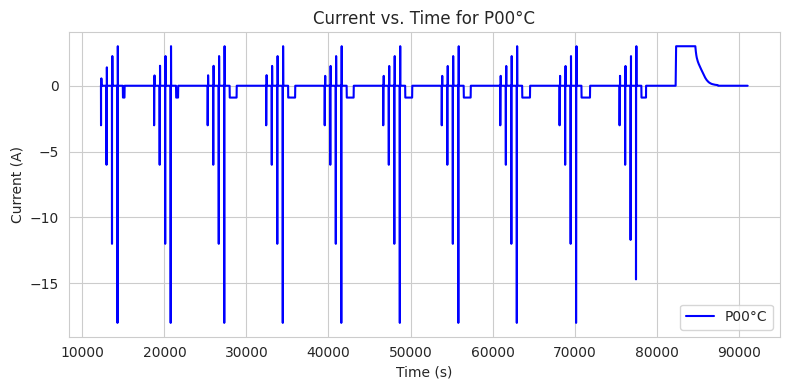

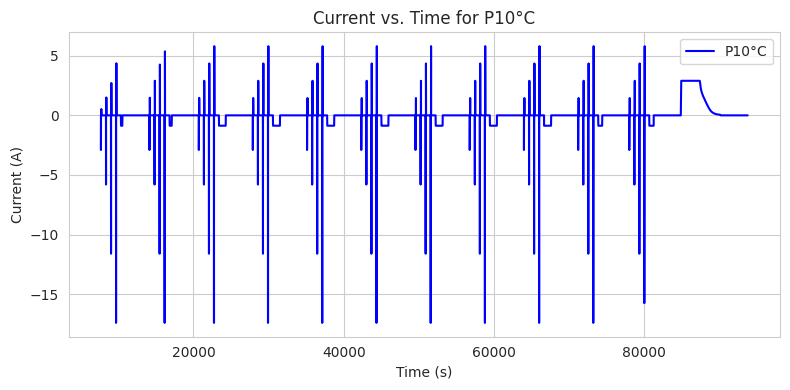

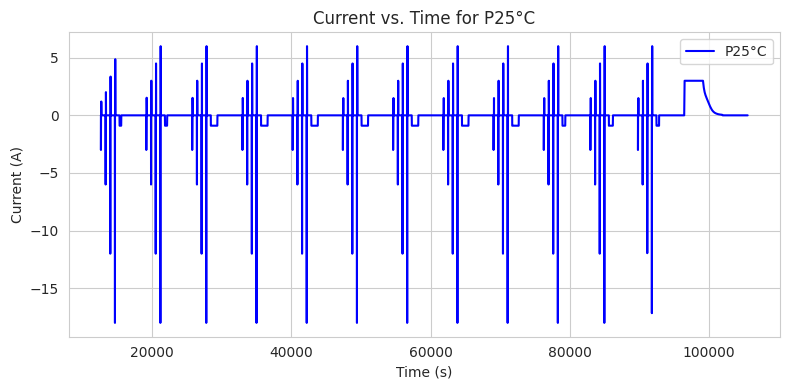

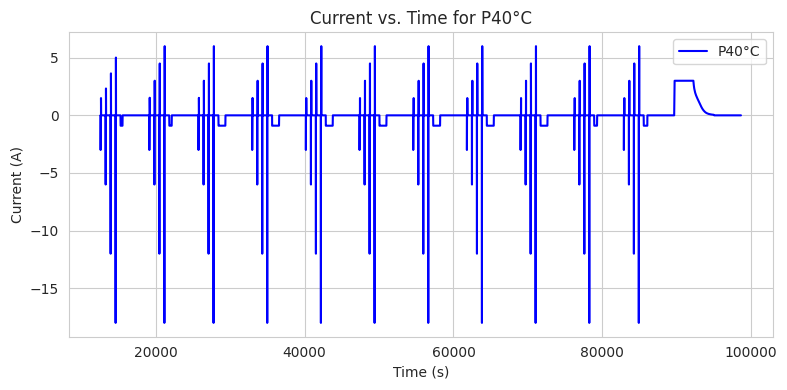

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import timedelta

def time_string_to_seconds(input_string: str) -> float:
    """Convert time string (HH:MM:SS.sss) to total seconds."""
    time_parts = input_string.split(":")
    second_parts = time_parts[2].split(".")
    return timedelta(
        hours=int(time_parts[0]),
        minutes=int(time_parts[1]),
        seconds=int(second_parts[0]),
        microseconds=int(second_parts[1]) * 1000,  # Convert to microseconds
    ).total_seconds()

# Define paths
Main_Path = "/kaggle/input/lg-hg2-18650-sn62a4-hppc-ocv/"
Path = os.path.join(Main_Path, "hppc/")

# Define temperature labels
temps = ['N20', 'N10', 'P00', 'P10', 'P25', 'P40']  # temperatures

# Loop through each temperature dataset
for temp in temps:
    file = os.path.join(Path, f'LGDBHG21865_DYN_{temp}.csv')
    
    # Read CSV file
    df = pd.read_csv(file, skiprows=30)
    df.columns = [
        "Time Stamp", "Step", "Status", "Prog Time", "Step Time", "Cycle", "Cycle Level", "Procedure",
        "Voltage", "Current", "Temperature", "Capacity", "WhAccu", "Cnt", "Empty"
    ]

    # Convert "Prog Time" to seconds
    df["Time (s)"] = df["Prog Time"].astype(str).apply(time_string_to_seconds)

    # Extract current and time
    current = df["Current"]
    time = df["Time (s)"]

    # Plot Current vs. Time
    fig, ax1 = plt.subplots(figsize=(8, 4))
    ax1.plot(time, current, color='blue', label=f'{temp}°C')
    ax1.set_xlabel("Time (s)")
    ax1.set_ylabel("Current (A)")
    ax1.set_title(f"Current vs. Time for {temp}°C")
    ax1.legend()
    plt.tight_layout()
    
    # Save each plot
    #plt.savefig(f'Current_vs_Time_{temp}.png', dpi=300)
    
    plt.show()  # Show the plot


## Voltage current Capacity vs time

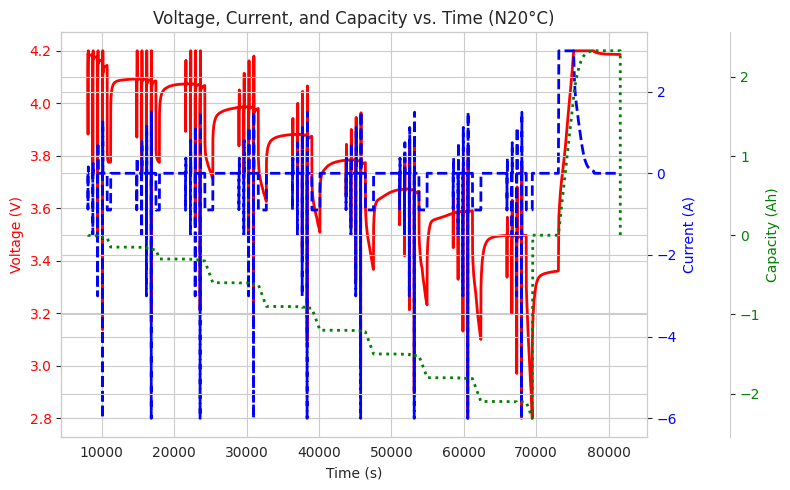

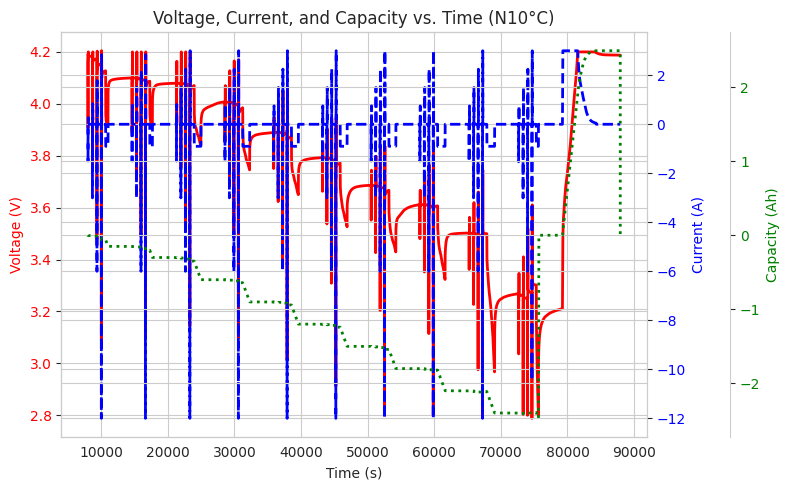

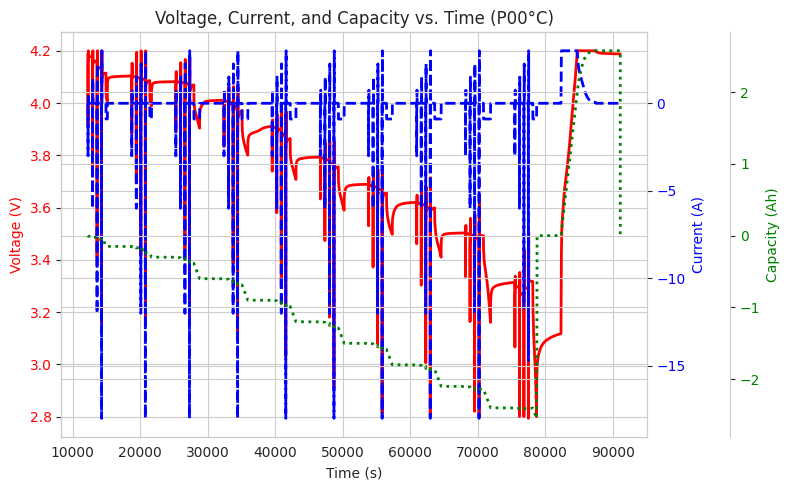

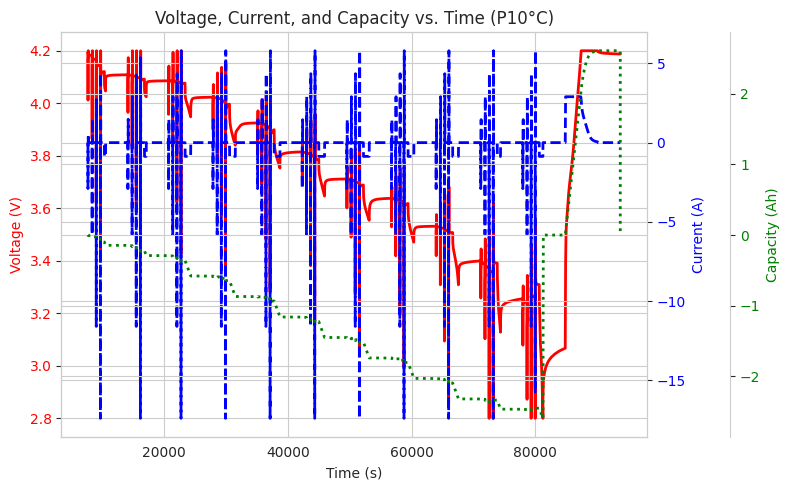

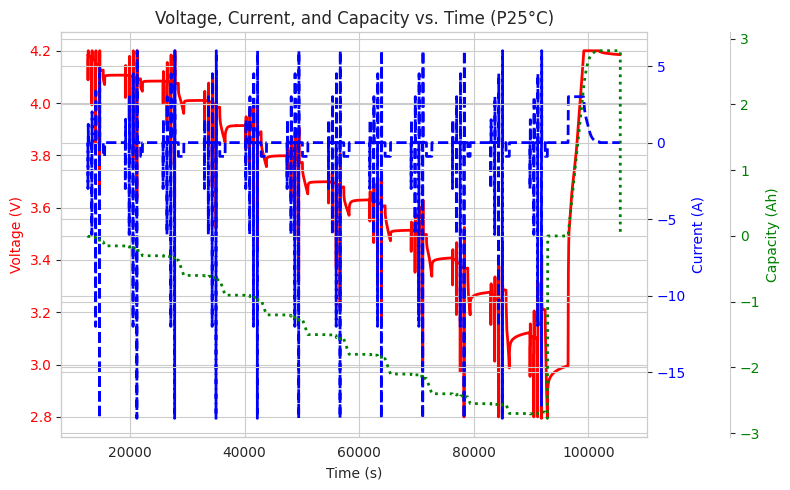

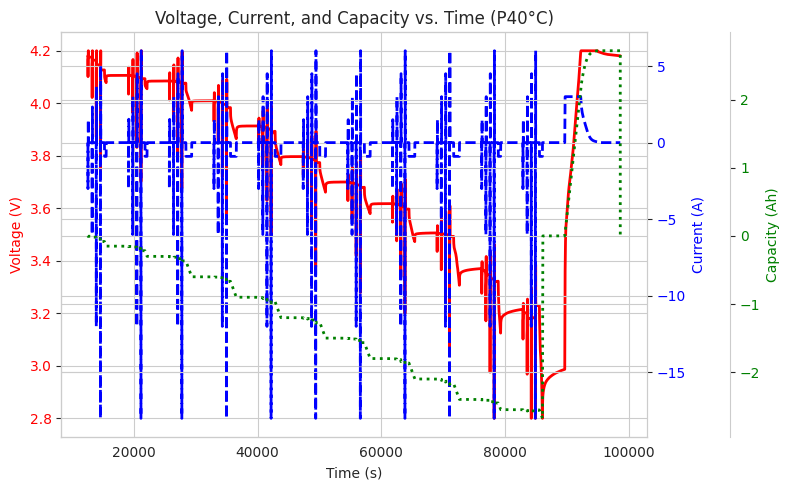

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import timedelta

def time_string_to_seconds(input_string: str) -> float:
    """Convert time string (HH:MM:SS.sss) to total seconds."""
    time_parts = input_string.split(":")
    second_parts = time_parts[2].split(".")
    return timedelta(
        hours=int(time_parts[0]),
        minutes=int(time_parts[1]),
        seconds=int(second_parts[0]),
        microseconds=int(second_parts[1]) * 1000,  # Convert to microseconds
    ).total_seconds()

# Define paths
Main_Path = "/kaggle/input/lg-hg2-18650-sn62a4-hppc-ocv/"
Path = os.path.join(Main_Path, "hppc/")

# Define temperature labels
temps = ['N20', 'N10', 'P00', 'P10', 'P25', 'P40']  # temperatures

# Loop through each temperature dataset
for temp in temps:
    file = os.path.join(Path, f'LGDBHG21865_DYN_{temp}.csv')
    
    # Read CSV file
    df = pd.read_csv(file, skiprows=30)
    df.columns = [
        "Time Stamp", "Step", "Status", "Prog Time", "Step Time", "Cycle", "Cycle Level", "Procedure",
        "Voltage", "Current", "Temperature", "Capacity", "WhAccu", "Cnt", "Empty"
    ]

    # Convert "Prog Time" to seconds
    df["Time (s)"] = df["Prog Time"].astype(str).apply(time_string_to_seconds)

    # Extract relevant columns
    time = df["Time (s)"]
    voltage = df["Voltage"]
    current = df["Current"]
    capacity = df["Capacity"]

    # Plot Voltage, Current, and Capacity vs. Time
    fig, ax1 = plt.subplots(figsize=(8, 5))

    # Voltage plot
    ax1.plot(time, voltage, color='r', lw=2, label="Voltage (V)")
    ax1.set_xlabel("Time (s)")
    ax1.set_ylabel("Voltage (V)", color='r')
    ax1.tick_params(axis='y', labelcolor='r')

    # Create second y-axis for Current
    ax2 = ax1.twinx()
    ax2.plot(time, current, color='b', lw=2, linestyle='dashed', label="Current (A)")
    ax2.set_ylabel("Current (A)", color='b')
    ax2.tick_params(axis='y', labelcolor='b')

    # Create third y-axis for Capacity (using another axis)
    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(("outward", 60))
    ax3.plot(time, capacity, color='g', lw=2, linestyle='dotted', label="Capacity (Ah)")
    ax3.set_ylabel("Capacity (Ah)", color='g')
    ax3.tick_params(axis='y', labelcolor='g')

    # Title and legend
    plt.title(f"Voltage, Current, and Capacity vs. Time ({temp}°C)")
    fig.tight_layout()

    # Save each plot
    #plt.savefig(f'Time_vs_Voltage_Current_Capacity_{temp}.png', dpi=300)

    plt.show()  # Show the plot


# Dynamic Data processing